<a href="https://colab.research.google.com/github/Alainm74/DataAnalystPortafolio/blob/main/Machine_Learning_Classification_Analysis_Python_Alain_Monroy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

MACHINE LEARNING AND PATTERN RECOGNITION

## Author: Ruben Alain Monroy Perez Negron

##1.Introduction

Apply any three regression or classification methods in Python. Dataset must have minimum 15 variables (including dependent and independent variables).



**Code and analysis should cover the following points**


0.   Provide Reference of the data source and identify what problem are you trying to solve using machine learning
1.   Choice of dependent and independent variables and selection of algorithms
2.   Data Preparation
3.   Feature selection
4.   Model Development and Evaluation
5.   Optimization
6.   Model Comparison

##2.Abstract

The following code elaborated and run in Google Colab, provides a detailed analysis about the determination of the best predictive model to determine the risk of burnout or attrition of employees, the current analysis is focused on the prediction for those groups of employees with a higher risk of getting burnout or attrition, by reviewing the dependent variables "WorkLifeBalance" and "JobSatisfaction", Class 1 and Class 2.

Three classification models, Logistic Regression, Gaussian Naive Bayes, and Support Vector Classification, were assessed for both variables, incorporating feature selection techniques such as the Correlation Matrix, Chi-square, and Mutual Information Classifier. Additionally, the search of better parameters for optimizing Gaussian Naive Bayes and Support Vector Classification was carried out, without meaningful results.

Regarding WorkLifeBalance, models Test 1.17 and Test 1.29 using Gaussian Naive Bayes with Correlation Matrix feature selection and different scalers were found to excel in predicting Class 1, while Test 1.2 Gaussian Naive Bayes provided better results for Class 2.

Regarding JobSatisfaction, models Test 2.5, Test 2.17, and Test 2.29 exhibited better predictive performance for both classes, by the simplicity of data use, the model Test 2.5 could be chosen with the current dataset.

Despite the selected models would provide a better predictive result with the current data set, it is important to consider that macro avg F-1 obtained in each one could be considered as not accurate enough.

Thus, future considerations involve collecting more data, exploring alternative feature selection methods, testing diverse algorithms like Decision Trees, and experimenting with different optimization techniques.

##3.Code Assessment

###3.0   Provide Reference of the data source and identify what problem are you trying to solve using machine learning

Source:

*  HR Analytics: Case Study: https://www.kaggle.com/datasets/bhanupratapbiswas/hr-analytics-case-study

Problem

The selected dataset is related to HR analytics providing insights into various aspects of human force within an organization.

Trends show that the level of satisfaction of employees is not only related to the wage, there are several attributes that can be considered more valuable to continue in a work relationship.

The following analysis will focus on the prediction for those groups of employees with a higher risk of getting burnout or trying to quit their jobs, by reviewing the following variables under analysis.

The variables under analysis will be:

*   WorkLifeBalance: Employee's work-life balance satisfaction level
*   JobSatisfaction: Employee's satisfaction level with their job


###3.1   Choice of dependent and independent variables and selection of algorithms

In [ ]:
#Import libraries to create data frame

import pandas as pd
import numpy as np

####3.1.1 Exploring dataset

In [ ]:
df = pd.read_csv('/content/WA_Fn-UseC_-HR-Employee-Attrition.csv')
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


In [ ]:
df.shape

(1470, 35)

####3.1.2 Identify missing values

In [ ]:
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

####3.1.3 Identifying duplicate values

In [ ]:
df.duplicated().sum()

0

####3.1.4 Initial stats for our variables

In [ ]:
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


###3.2   Data Preparation


#####3.2.1 Mapping - review of variables

Identify the type of variables and attributes depending on the properties

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

Filtering the Dtype "object" variables

Source:

*   pandas.DataFrame.select_dtypes, https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.select_dtypes.html

In [ ]:
#Selecting those variables with Dtype as "object"

df.select_dtypes(include=['object']).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Attrition       1470 non-null   object
 1   BusinessTravel  1470 non-null   object
 2   Department      1470 non-null   object
 3   EducationField  1470 non-null   object
 4   Gender          1470 non-null   object
 5   JobRole         1470 non-null   object
 6   MaritalStatus   1470 non-null   object
 7   Over18          1470 non-null   object
 8   OverTime        1470 non-null   object
dtypes: object(9)
memory usage: 103.5+ KB


These 9 variables, should be preprocessed before running our models. It is important to identify their properties and type of attributes.

Considering our interest variables (WorkLifeBalance, JobSatisfaction), it is important to identify if those 9 variables has an impact on them and determine if an scale is nedded or random assignment could be carried out







######3.2.1.1 Two output variables
Variables: Attrition, Gender, Over18, OverTime will be reviewed

######3.2.1.1.a JobSatisfaction

In [ ]:
pd.crosstab(df['Attrition'], df['JobSatisfaction'])

JobSatisfaction,1,2,3,4
Attrition,,,,
No,223,234,369,407
Yes,66,46,73,52


In [ ]:
pd.crosstab(df['Gender'], df['JobSatisfaction'])

JobSatisfaction,1,2,3,4
Gender,,,,
Female,119,118,181,170
Male,170,162,261,289


In [ ]:
pd.crosstab(df['Over18'], df['JobSatisfaction'])

JobSatisfaction,1,2,3,4
Over18,,,,
Y,289,280,442,459


In [ ]:
pd.crosstab(df['OverTime'], df['JobSatisfaction'])

JobSatisfaction,1,2,3,4
OverTime,,,,
No,205,211,321,317
Yes,84,69,121,142


######3.2.1.1.b WorkLifeBalance

In [ ]:
pd.crosstab(df['Attrition'], df['WorkLifeBalance'])

WorkLifeBalance,1,2,3,4
Attrition,,,,
No,55,286,766,126
Yes,25,58,127,27


In [ ]:
pd.crosstab(df['Gender'], df['WorkLifeBalance'])

WorkLifeBalance,1,2,3,4
Gender,,,,
Female,30,136,365,57
Male,50,208,528,96


In [ ]:
pd.crosstab(df['Over18'], df['WorkLifeBalance'])

WorkLifeBalance,1,2,3,4
Over18,,,,
Y,80,344,893,153


In [ ]:
pd.crosstab(df['OverTime'], df['WorkLifeBalance'])

WorkLifeBalance,1,2,3,4
OverTime,,,,
No,58,240,639,117
Yes,22,104,254,36


It can be concluded that for the four variables (Attrition, Gender, Over18, OverTime), there are not an specific order how ever, for gender, a random selection between 0 and 1 will be chosen while the others will be 0 -> No, 1 -> Yes

######3.2.1.1.c Multiple output variables
Variables

Ordinal attibute variables:

*   BusinessTravel - Non-Travel -> 1, Travel_Rarely -> 2, Travel_Frequently -> 3
*   MaritalStatus - Single -> 1, Married -> 2, Divorced -> 3

Nominal attribute variables:
Random mapping with LabelEncoder will be used.
*   Department
*   EducationField
*   JobRole

#####3.2.1.2 Mapping - change previously indicated variables

######3.2.1.2.a Random mapping

Source:

*   Label Encoding: (https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html)

In [ ]:
# importing LabelEncoder
from sklearn.preprocessing import LabelEncoder

#list of attributes to be randomly mapped
le = LabelEncoder()
ls = ['Department','EducationField','JobRole','Gender']

#loop through the list of attributes to be randomly mapped
for col in ls:
  df[col] = le.fit_transform(df[col])

######3.2.1.2.b Manual mapping

In [ ]:
df['Attrition'] = df['Attrition'].map({'Yes':1,'No':0})
df['Over18'] = df['Over18'].map({'Y':1})
df['OverTime'] = df['OverTime'].map({'Yes':1,'No':0})
df['BusinessTravel'] = df['BusinessTravel'].map({'Non-Travel':1,'Travel_Rarely':2, 'Travel_Frequently':3})
df['MaritalStatus'] = df['MaritalStatus'].map({'Single':1,'Married':2, 'Divorced':3})

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   Age                       1470 non-null   int64
 1   Attrition                 1470 non-null   int64
 2   BusinessTravel            1470 non-null   int64
 3   DailyRate                 1470 non-null   int64
 4   Department                1470 non-null   int64
 5   DistanceFromHome          1470 non-null   int64
 6   Education                 1470 non-null   int64
 7   EducationField            1470 non-null   int64
 8   EmployeeCount             1470 non-null   int64
 9   EmployeeNumber            1470 non-null   int64
 10  EnvironmentSatisfaction   1470 non-null   int64
 11  Gender                    1470 non-null   int64
 12  HourlyRate                1470 non-null   int64
 13  JobInvolvement            1470 non-null   int64
 14  JobLevel                  1470 non-null 

In [ ]:
 df.describe()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,0.161224,2.086395,802.485714,1.260544,9.192517,2.912925,2.247619,1.0,1024.865306,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,0.367863,0.532170,403.509100,0.527792,8.106864,1.024165,1.331369,0.0,602.024335,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,0.000000,1.000000,102.000000,0.000000,1.000000,1.000000,0.000000,1.0,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,0.000000,2.000000,465.000000,1.000000,2.000000,2.000000,1.000000,1.0,491.250000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,0.000000,2.000000,802.000000,1.000000,7.000000,3.000000,2.000000,1.0,1020.500000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,0.000000,2.000000,1157.000000,2.000000,14.000000,4.000000,3.000000,1.0,1555.750000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1.000000,3.000000,1499.000000,2.000000,29.000000,5.000000,5.000000,1.0,2068.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


######3.2.1.2.c Classification of attributes by their properties:

*  Age - Ratio
*  Attrition - Nominal
*  BusinessTravel - Ordinal
*  DailyRate - Ratio
*  Department - Nominal
*  DistanceFromHome - Ratio
*  Education - Ordinal
*  EducationField - Nominal
*  EmployeeCount - Nominal
*  EmployeeNumber - Nominal
*  EnvironmentSatisfaction - Ordinal
*  Gender - Nominal
*  HourlyRate - Ratio
*  JobInvolvement - Ordinal
*  JobLevel - Ordinal
*  JobRole - Nominal
*  JobSatisfaction - Ordinal (Variable to be analyzed)
*  MaritalStatus - Ordinal
*  MonthlyIncome - Ratio
*  MonthlyRate - Ratio
*  NumCompaniesWorked - Ordinal
*  Over18 - Nominal
*  OverTime - Nominal
*  PercentSalaryHike - Ratio
*  PerformanceRating - Ordinal
*  RelationshipSatisfaction - Ordinal
*  StandardHours - Nominal
*  StockOptionLevel - Ordinal
*  TotalWorkingYears - Ratio
*  TrainingTimesLastYear - Ordinal
*  WorkLifeBalance - Ordinal (Variable to be analyzed)
*  YearsAtCompany - ratio
*  YearsInCurrentRole - ratio
*  YearsSinceLastPromotion - ratio
*  YearsWithCurrManager - ratio


###3.3   Feature selection


Considering that the two variables under analysis are discrete, this lead to a classification task. Thus, in order to elaborate the feature selection, different techniques were used such as:
* Correlation matrix,
* Chi-square test, and
* Mutual_info_classifier

Further information about each technique is provided in file "GroupReport_Ruben_Monroy_Jayanth_Komala_Utku_Can.docx"

####3.3.1 Correlation Heatmap

Sources:

*   How to create a seaborn correlation heatmap in Python?, https://www.geeksforgeeks.org/how-to-create-a-seaborn-correlation-heatmap-in-python/
*   How to Create a Seaborn Correlation Heatmap in Python?, https://medium.com/@szabo.bibor/how-to-create-a-seaborn-correlation-heatmap-in-python-834c0686b88e
*   sklearn.feature_selection.SelectKBest, https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectKBest.html
*   sklearn.feature_selection.mutual_info_classif, https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.mutual_info_classif.html#sklearn.feature_selection.mutual_info_classif
*   sklearn.feature_selection.chi2, https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.chi2.html#sklearn.feature_selection.chi2

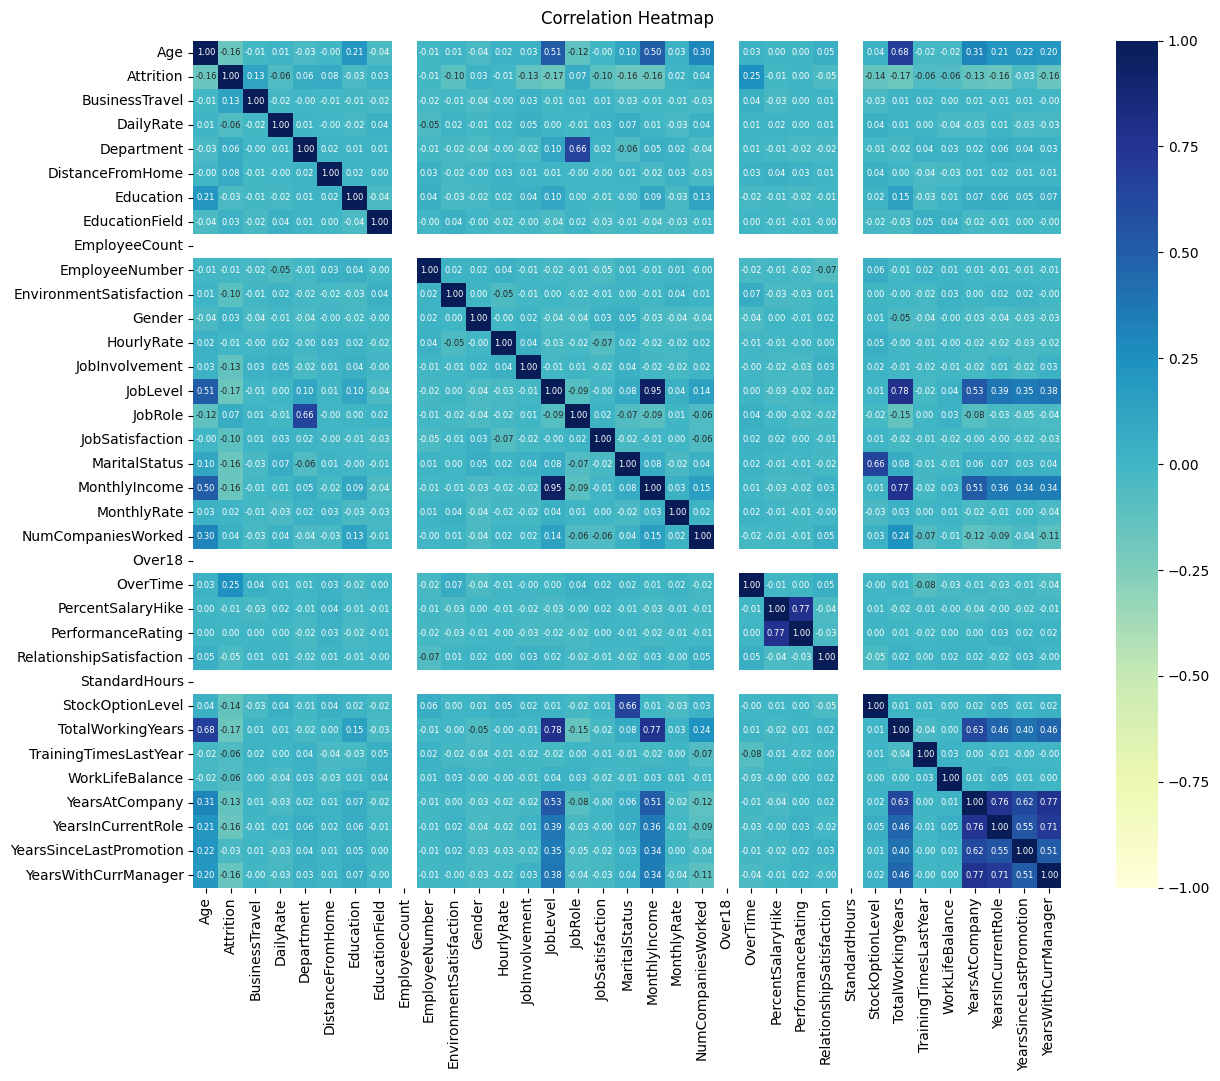

In [ ]:
#import required libraries
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 11))

dataplot = sns.heatmap(df.corr(), cmap="YlGnBu", annot=True, fmt=".2f", vmin=-1, vmax=1, annot_kws={"size": 6})
dataplot.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

plt.show()

#####3.3.1.1 Correlation matrix insights

1.   Variables "EmployeeCount", "Over18" and "StandardHours" do not provide any correlation values, due that these have only a single constant value for all rows, which means there is no variation.
As "EmployeeCount", "Over18" and "StandardHours" variables do not provide useful information for understanding relationships with the variables under analysis, these will not be considerer in the models.

**Categorical variables - Classification Analysis**

2.   Regarding the variables under analysis WorkLifeBalance and JobSatisfaction, additional analysis is provided below to identify top correlated attributes




It is important to consider that the first feature selection scenario for the variables under analysis will be based on selection of top variables with correlation marix.

However, considering that the dependent variables are mixed within discrete and continuous independent variables , others method such as mutual_info_classif, chi2 (for classification analysis) will be used for feature selection

####3.3.2 Feature selection

#####3.3.2.1  WorkLifeBalance


######3.3.2.1.a Correlation

In [ ]:
#Classification analysis - WorkLifeBalance

cor = df.drop(columns=['EmployeeCount','Over18','StandardHours']).corr()
cor_target_v1 = abs(cor["WorkLifeBalance"])
cor_target_v1

Age                         0.021490
Attrition                   0.063939
BusinessTravel              0.004209
DailyRate                   0.037848
Department                  0.026383
DistanceFromHome            0.026556
Education                   0.009819
EducationField              0.041191
EmployeeNumber              0.010309
EnvironmentSatisfaction     0.027627
Gender                      0.002753
HourlyRate                  0.004607
JobInvolvement              0.014617
JobLevel                    0.037818
JobRole                     0.027764
JobSatisfaction             0.019459
MaritalStatus               0.014708
MonthlyIncome               0.030683
MonthlyRate                 0.007963
NumCompaniesWorked          0.008366
OverTime                    0.027092
PercentSalaryHike           0.003280
PerformanceRating           0.002572
RelationshipSatisfaction    0.019604
StockOptionLevel            0.004129
TotalWorkingYears           0.001008
TrainingTimesLastYear       0.028072
W

In [ ]:
#classification analysis -
cor = df.drop(columns=['EmployeeCount','Over18','StandardHours']).corr()
cor_target_v1 = abs(cor["WorkLifeBalance"])
cor_target_v1

Age                         0.021490
Attrition                   0.063939
BusinessTravel              0.004209
DailyRate                   0.037848
Department                  0.026383
DistanceFromHome            0.026556
Education                   0.009819
EducationField              0.041191
EmployeeNumber              0.010309
EnvironmentSatisfaction     0.027627
Gender                      0.002753
HourlyRate                  0.004607
JobInvolvement              0.014617
JobLevel                    0.037818
JobRole                     0.027764
JobSatisfaction             0.019459
MaritalStatus               0.014708
MonthlyIncome               0.030683
MonthlyRate                 0.007963
NumCompaniesWorked          0.008366
OverTime                    0.027092
PercentSalaryHike           0.003280
PerformanceRating           0.002572
RelationshipSatisfaction    0.019604
StockOptionLevel            0.004129
TotalWorkingYears           0.001008
TrainingTimesLastYear       0.028072
W

In [ ]:
#choose those  with correlation > than x, inthis case x=0.02
chosen_features_v1 = cor_target_v1[cor_target_v1>0.02]
chosen_features_v1

Age                        0.021490
Attrition                  0.063939
DailyRate                  0.037848
Department                 0.026383
DistanceFromHome           0.026556
EducationField             0.041191
EnvironmentSatisfaction    0.027627
JobLevel                   0.037818
JobRole                    0.027764
MonthlyIncome              0.030683
OverTime                   0.027092
TrainingTimesLastYear      0.028072
WorkLifeBalance            1.000000
YearsInCurrentRole         0.049856
Name: WorkLifeBalance, dtype: float64

In [ ]:
#Attributes to be excluded, correlation <= than x, inthis case x=0.02
chosen_features_v1 = cor_target_v1[cor_target_v1<=0.02]
chosen_features_v1

BusinessTravel              0.004209
Education                   0.009819
EmployeeNumber              0.010309
Gender                      0.002753
HourlyRate                  0.004607
JobInvolvement              0.014617
JobSatisfaction             0.019459
MaritalStatus               0.014708
MonthlyRate                 0.007963
NumCompaniesWorked          0.008366
PercentSalaryHike           0.003280
PerformanceRating           0.002572
RelationshipSatisfaction    0.019604
StockOptionLevel            0.004129
TotalWorkingYears           0.001008
YearsAtCompany              0.012089
YearsSinceLastPromotion     0.008941
YearsWithCurrManager        0.002759
Name: WorkLifeBalance, dtype: float64

######3.3.2.1.b Chi-square test

In [ ]:
#Import required libraries
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

#Split data
X = df.drop(columns=['EmployeeCount','Over18','StandardHours'])
y = df['WorkLifeBalance']

# Select the top 15 features using chi-squared feature selection
k = 16
selected_features_Chi21 = SelectKBest(chi2, k=k).fit(X, y)
X_new = selected_features_Chi21.transform(X)

# Print the names of the selected features
selected_indices_Chi21 = selected_features_Chi21.get_support(indices=True)
selected_feature_names_Chi21 = X.columns[selected_indices_Chi21]
print("Selected Feature Names:")
for idx, name in enumerate(selected_feature_names_Chi21):
    value = X_new[0, idx]
    print(f"{name} \t, Chi2 Test value: {value}")


Selected Feature Names:
Attrition 	, Chi2 Test value: 1
DailyRate 	, Chi2 Test value: 1102
DistanceFromHome 	, Chi2 Test value: 1
EducationField 	, Chi2 Test value: 1
EmployeeNumber 	, Chi2 Test value: 1
HourlyRate 	, Chi2 Test value: 94
JobRole 	, Chi2 Test value: 7
MonthlyIncome 	, Chi2 Test value: 5993
MonthlyRate 	, Chi2 Test value: 19479
NumCompaniesWorked 	, Chi2 Test value: 8
StockOptionLevel 	, Chi2 Test value: 0
TotalWorkingYears 	, Chi2 Test value: 8
WorkLifeBalance 	, Chi2 Test value: 1
YearsAtCompany 	, Chi2 Test value: 6
YearsInCurrentRole 	, Chi2 Test value: 4
YearsSinceLastPromotion 	, Chi2 Test value: 0


######3.3.2.1.c mutual_info_classif

In [ ]:
#Import required libraries
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_classif

#Split data
X = df.drop(columns=['EmployeeCount','Over18','StandardHours'])
y = df['WorkLifeBalance']

# Select the top 15 features using mutual_info_classif feature selection
k = 16
selected_features_mic1 = SelectKBest(mutual_info_classif, k=k).fit(X, y)
X_new = selected_features_mic1.transform(X)

# Print the names of the selected features
selected_indices_mic1 = selected_features_mic1.get_support(indices=True)
selected_feature_names_mic1 = X.columns[selected_indices_mic1]
print("Selected Feature Names:")
for idx, name in enumerate(selected_feature_names_mic1):
    value = X_new[0, idx]
    print(f"{name} \t, mutual_info_classif value: {value}")

Selected Feature Names:
Age 	, mutual_info_classif value: 41
Attrition 	, mutual_info_classif value: 1
BusinessTravel 	, mutual_info_classif value: 2
DailyRate 	, mutual_info_classif value: 1102
Department 	, mutual_info_classif value: 2
Education 	, mutual_info_classif value: 2
EnvironmentSatisfaction 	, mutual_info_classif value: 2
Gender 	, mutual_info_classif value: 0
JobRole 	, mutual_info_classif value: 7
MaritalStatus 	, mutual_info_classif value: 1
MonthlyRate 	, mutual_info_classif value: 19479
OverTime 	, mutual_info_classif value: 1
StockOptionLevel 	, mutual_info_classif value: 0
WorkLifeBalance 	, mutual_info_classif value: 1
YearsInCurrentRole 	, mutual_info_classif value: 4
YearsSinceLastPromotion 	, mutual_info_classif value: 0


#####3.3.2.2 JobSatisfaction

######3.3.2.2.a Correlation

In [ ]:
#Classification analysis - JobSatisfaction

In [ ]:
cor = df.drop(columns=['EmployeeCount','Over18','StandardHours']).corr()
cor_target_v2 = abs(cor["JobSatisfaction"])
cor_target_v2

Age                         0.004892
Attrition                   0.103481
BusinessTravel              0.008666
DailyRate                   0.030571
Department                  0.021001
DistanceFromHome            0.003669
Education                   0.011296
EducationField              0.034401
EmployeeNumber              0.046247
EnvironmentSatisfaction     0.006784
Gender                      0.033252
HourlyRate                  0.071335
JobInvolvement              0.021476
JobLevel                    0.001944
JobRole                     0.017537
JobSatisfaction             1.000000
MaritalStatus               0.024360
MonthlyIncome               0.007157
MonthlyRate                 0.000644
NumCompaniesWorked          0.055699
OverTime                    0.024539
PercentSalaryHike           0.020002
PerformanceRating           0.002297
RelationshipSatisfaction    0.012454
StockOptionLevel            0.010690
TotalWorkingYears           0.020185
TrainingTimesLastYear       0.005779
W

In [ ]:
#choose those  with correlation > than x, inthis case x=0.02
chosen_features_v2 = cor_target_v2[cor_target_v2>0.02]
chosen_features_v2

Attrition               0.103481
DailyRate               0.030571
Department              0.021001
EducationField          0.034401
EmployeeNumber          0.046247
Gender                  0.033252
HourlyRate              0.071335
JobInvolvement          0.021476
JobSatisfaction         1.000000
MaritalStatus           0.024360
NumCompaniesWorked      0.055699
OverTime                0.024539
PercentSalaryHike       0.020002
TotalWorkingYears       0.020185
YearsWithCurrManager    0.027656
Name: JobSatisfaction, dtype: float64

######3.3.2.2.b Chi-square test

In [ ]:
#Import required libraries
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

#Split data
X = df.drop(columns=['EmployeeCount','Over18','StandardHours'])
y = df['JobSatisfaction']

# Select the top 15 features using chi-squared feature selection
k = 16
selected_features_Chi22 = SelectKBest(chi2, k=k).fit(X, y)
X_new = selected_features_Chi22.transform(X)

# Print the names of the selected features
selected_indices_Chi22 = selected_features_Chi22.get_support(indices=True)
selected_feature_names_Chi22 = X.columns[selected_indices_Chi22]
print("Selected Feature Names:")
for idx, name in enumerate(selected_feature_names_Chi22):
    value = X_new[0, idx]
    print(f"{name} \t, Chi2 Test value: {value}")


Selected Feature Names:
Attrition 	, Chi2 Test value: 1
DailyRate 	, Chi2 Test value: 1102
DistanceFromHome 	, Chi2 Test value: 1
EducationField 	, Chi2 Test value: 1
EmployeeNumber 	, Chi2 Test value: 1
EnvironmentSatisfaction 	, Chi2 Test value: 2
HourlyRate 	, Chi2 Test value: 94
JobSatisfaction 	, Chi2 Test value: 4
MonthlyIncome 	, Chi2 Test value: 5993
MonthlyRate 	, Chi2 Test value: 19479
NumCompaniesWorked 	, Chi2 Test value: 8
OverTime 	, Chi2 Test value: 1
PercentSalaryHike 	, Chi2 Test value: 11
TotalWorkingYears 	, Chi2 Test value: 8
YearsSinceLastPromotion 	, Chi2 Test value: 0
YearsWithCurrManager 	, Chi2 Test value: 5


######3.3.2.2.c mutual_info_classif

In [ ]:
#Import required libraries
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_classif

#Split data
X = df.drop(columns=['EmployeeCount','Over18','StandardHours'])
y = df['JobSatisfaction']

# Select the top 15 features using mutual_info_classif feature selection
k = 16
selected_features_mic2 = SelectKBest(mutual_info_classif, k=k).fit(X, y)
X_new = selected_features_mic2.transform(X)

# Print the names of the selected features
selected_indices_mic2 = selected_features_mic2.get_support(indices=True)
selected_feature_names_mic2 = X.columns[selected_indices_mic2]
print("Selected Feature Names:")
for idx, name in enumerate(selected_feature_names_mic2):
    value = X_new[0, idx]
    print(f"{name} \t, mutual_info_classif value: {value}")

Selected Feature Names:
Age 	, mutual_info_classif value: 41
Attrition 	, mutual_info_classif value: 1
Education 	, mutual_info_classif value: 2
EducationField 	, mutual_info_classif value: 1
EnvironmentSatisfaction 	, mutual_info_classif value: 2
JobLevel 	, mutual_info_classif value: 2
JobRole 	, mutual_info_classif value: 7
JobSatisfaction 	, mutual_info_classif value: 4
MonthlyIncome 	, mutual_info_classif value: 5993
MonthlyRate 	, mutual_info_classif value: 19479
OverTime 	, mutual_info_classif value: 1
PerformanceRating 	, mutual_info_classif value: 3
StockOptionLevel 	, mutual_info_classif value: 0
YearsInCurrentRole 	, mutual_info_classif value: 4
YearsSinceLastPromotion 	, mutual_info_classif value: 0
YearsWithCurrManager 	, mutual_info_classif value: 5


#####3.3.2.3 Selected features

Considering the different feature selection analysis, the selected features for each variable under analysis are as follows:

######3.3.2.3.b WorkLifeBalance

**Correlation**

-  Age
-  Attrition
-  DailyRate
-  Department
-  DistanceFromHome
-  EducationField
-  EnvironmentSatisfaction
-  JobLevel
-  JobRole
-  MonthlyIncome
-  OverTime
-  TrainingTimesLastYear
-  YearsInCurrentRole

**chi-square**

-  Attrition
-  DailyRate
-  DistanceFromHome
-  EducationField
-  EmployeeNumber
-  HourlyRate
-  JobRole
-  MonthlyIncome
-  MonthlyRate
-  NumCompaniesWorked
-  StockOptionLevel
-  TotalWorkingYears
-  YearsAtCompany
-  YearsInCurrentRole
-  YearsSinceLastPromotion

**mutual_info_classifier**

-  Department
-  Education
-  EmployeeNumber
-  HourlyRate
-  JobInvolvement
-  JobLevel
-  MonthlyRate
-  PerformanceRating
-  RelationshipSatisfaction
-  StockOptionLevel
-  TotalWorkingYears
-  WorkLifeBalance
-  YearsAtCompany
-  YearsInCurrentRole
-  YearsSinceLastPromotion
-  YearsWithCurrManager



######3.3.2.3.b JobSatisfaction

**Correlation**

-  Age
-  BusinessTravel
-  DistanceFromHome
-  Education
-  EnvironmentSatisfaction
-  JobLevel
-  JobRole
-  MonthlyIncome
-  MonthlyRate
-  PerformanceRating
-  RelationshipSatisfaction
-  StockOptionLevel
-  TrainingTimesLastYear
-  WorkLifeBalance
-  YearsAtCompany
-  YearsInCurrentRole
-  YearsSinceLastPromotion

**chi-square**

-  Attrition
-  DailyRate
-  DistanceFromHome
-  EducationField
-  EmployeeNumber
-  EnvironmentSatisfaction
-  HourlyRate
-  JobSatisfaction
-  MonthlyIncome
-  MonthlyRate
-  NumCompaniesWorked
-  OverTime
-  PercentSalaryHike
-  TotalWorkingYears
-  YearsSinceLastPromotion
-  YearsWithCurrManager

**mutual_info_classifier**

-  Age
-  Attrition
-  Department
-  Education
-  EducationField
-  EmployeeNumber
-  EnvironmentSatisfaction
-  JobLevel
-  JobSatisfaction
-  MaritalStatus
-  MonthlyIncome
-  MonthlyRate
-  OverTime
-  RelationshipSatisfaction
-  TotalWorkingYears
-  YearsAtCompany

###3.4   Model Development and Evaluation


####3.4.1 Write functions for implementing the model

#####3.4.1.1 Classification Analysis

######3.4.1.1.a Logistic Regression

In [ ]:
#Import requiered libraries
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report

In [ ]:
#Create function for Logistic Regression
def LR(X_train, X_test, y_train, y_test):
  logReg = LogisticRegression()
  logReg.fit(X_train, y_train)
  y_pred = logReg.predict(X_test)

  print(confusion_matrix(y_test, y_pred))
  print(classification_report(y_test, y_pred))

######3.4.1.1.b Gaussian Naive Bayes Classifier

In [ ]:
#Import requiered library
from sklearn.naive_bayes import GaussianNB

In [ ]:
#Create function for Gaussian Naive Bayes
def gaussian(X_train, X_test, y_train, y_test):
  gnb = GaussianNB()
  gnb.fit(X_train, y_train)
  y_pred = gnb.predict(X_test)

  print(confusion_matrix(y_test, y_pred))
  print(classification_report(y_test, y_pred))

######3.4.1.1.c Support Vector Classifier

In [ ]:
#Import requiered library
from sklearn.svm import SVC

In [ ]:
#Create function for Support Vector Classifier
def support(X_train, X_test, y_train, y_test):
  svc = SVC()
  svc.fit(X_train, y_train)
  y_pred = svc.predict(X_test)

  print(confusion_matrix(y_test, y_pred))
  print(classification_report(y_test, y_pred))

####3.4.2. Models

As mention before, variables 'EmployeeCount','Over18','StandardHours' will not be considered for the models, these only provide the same value for all the records.

#####3.4.2.1 WorkLifeBalance - Classification Analysis

######3.4.2.1.a Experiment without feature selection

In [ ]:
#Split data
X1 = df.drop(columns=['WorkLifeBalance','EmployeeCount','Over18','StandardHours'])
y1 = df['WorkLifeBalance']

In [ ]:
#Split dataframe into random train and test subsets

from sklearn.model_selection import train_test_split

X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.25, random_state = 42)

In [ ]:
#Test 1.1
LR(X1_train, X1_test, y1_train, y1_test)

[[  0   0  22   0]
 [  0   0  74   0]
 [  0   0 224   0]
 [  0   0  48   0]]
              precision    recall  f1-score   support

           1       0.00      0.00      0.00        22
           2       0.00      0.00      0.00        74
           3       0.61      1.00      0.76       224
           4       0.00      0.00      0.00        48

    accuracy                           0.61       368
   macro avg       0.15      0.25      0.19       368
weighted avg       0.37      0.61      0.46       368



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels wit

######Top model variable under analysis 1 - for those with low rate of WorkLifeBalance (2)

In [ ]:
#Test 1.2
gaussian(X1_train, X1_test, y1_train, y1_test)

[[  3   1  18   0]
 [  7   1  65   1]
 [ 17   3 204   0]
 [  5   1  42   0]]
              precision    recall  f1-score   support

           1       0.09      0.14      0.11        22
           2       0.17      0.01      0.03        74
           3       0.62      0.91      0.74       224
           4       0.00      0.00      0.00        48

    accuracy                           0.57       368
   macro avg       0.22      0.27      0.22       368
weighted avg       0.42      0.57      0.46       368



In [ ]:
#Test 1.3
support(X1_train, X1_test, y1_train, y1_test)

[[  0   0  22   0]
 [  0   0  74   0]
 [  0   0 224   0]
 [  0   0  48   0]]
              precision    recall  f1-score   support

           1       0.00      0.00      0.00        22
           2       0.00      0.00      0.00        74
           3       0.61      1.00      0.76       224
           4       0.00      0.00      0.00        48

    accuracy                           0.61       368
   macro avg       0.15      0.25      0.19       368
weighted avg       0.37      0.61      0.46       368



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


######3.4.2.1.b Feature selection using correlation matrix

In [ ]:
X11_feat = df.drop(columns=['WorkLifeBalance','EmployeeCount','Over18','StandardHours', 'BusinessTravel','Education','EmployeeNumber','Gender','HourlyRate','JobInvolvement','JobSatisfaction','MaritalStatus','MonthlyRate','NumCompaniesWorked','PercentSalaryHike','PerformanceRating','RelationshipSatisfaction','StockOptionLevel','TotalWorkingYears','YearsAtCompany','YearsSinceLastPromotion','YearsWithCurrManager'])
y11 = df['WorkLifeBalance']

In [ ]:
X11_train_feat, X11_test_feat, y11_train, y11_test = train_test_split(X11_feat, y11, test_size = 0.25, random_state = 42)

In [ ]:
#Test 1.4
LR(X11_train_feat, X11_test_feat, y11_train, y11_test)

[[  0   0  22   0]
 [  0   0  74   0]
 [  0   0 224   0]
 [  0   0  48   0]]
              precision    recall  f1-score   support

           1       0.00      0.00      0.00        22
           2       0.00      0.00      0.00        74
           3       0.61      1.00      0.76       224
           4       0.00      0.00      0.00        48

    accuracy                           0.61       368
   macro avg       0.15      0.25      0.19       368
weighted avg       0.37      0.61      0.46       368



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels wit

In [ ]:
#Test 1.5
gaussian(X11_train_feat, X11_test_feat, y11_train, y11_test)

[[  1   0  21   0]
 [  1   0  73   0]
 [  0   0 224   0]
 [  2   1  45   0]]
              precision    recall  f1-score   support

           1       0.25      0.05      0.08        22
           2       0.00      0.00      0.00        74
           3       0.62      1.00      0.76       224
           4       0.00      0.00      0.00        48

    accuracy                           0.61       368
   macro avg       0.22      0.26      0.21       368
weighted avg       0.39      0.61      0.47       368



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
#Test 1.6
support(X11_train_feat, X11_test_feat, y11_train, y11_test)

[[  0   0  22   0]
 [  0   0  74   0]
 [  0   0 224   0]
 [  0   0  48   0]]
              precision    recall  f1-score   support

           1       0.00      0.00      0.00        22
           2       0.00      0.00      0.00        74
           3       0.61      1.00      0.76       224
           4       0.00      0.00      0.00        48

    accuracy                           0.61       368
   macro avg       0.15      0.25      0.19       368
weighted avg       0.37      0.61      0.46       368



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


######3.4.2.1.c Feature selection using chi2

In [ ]:
#Split data
X12_feat = df.drop(columns=['WorkLifeBalance','EmployeeCount','Over18','StandardHours','Age','BusinessTravel','Department','Education','EnvironmentSatisfaction','Gender','JobInvolvement','JobLevel','JobSatisfaction','MaritalStatus','OverTime','PercentSalaryHike','PerformanceRating','RelationshipSatisfaction','TrainingTimesLastYear','YearsWithCurrManager'])
y12 = df['WorkLifeBalance']


In [ ]:
X12_train_feat, X12_test_feat, y12_train, y12_test = train_test_split(X12_feat, y12, test_size = 0.25, random_state = 42)

In [ ]:
#Test 1.7
LR(X12_train_feat, X12_test_feat, y12_train, y12_test)

[[  0   0  22   0]
 [  0   0  74   0]
 [  0   0 224   0]
 [  0   0  48   0]]
              precision    recall  f1-score   support

           1       0.00      0.00      0.00        22
           2       0.00      0.00      0.00        74
           3       0.61      1.00      0.76       224
           4       0.00      0.00      0.00        48

    accuracy                           0.61       368
   macro avg       0.15      0.25      0.19       368
weighted avg       0.37      0.61      0.46       368



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels wit

In [ ]:
#Test 1.8
gaussian(X12_train_feat, X12_test_feat, y12_train, y12_test)

[[  1   0  21   0]
 [  2   0  72   0]
 [  2   0 222   0]
 [  2   0  46   0]]
              precision    recall  f1-score   support

           1       0.14      0.05      0.07        22
           2       0.00      0.00      0.00        74
           3       0.61      0.99      0.76       224
           4       0.00      0.00      0.00        48

    accuracy                           0.61       368
   macro avg       0.19      0.26      0.21       368
weighted avg       0.38      0.61      0.47       368



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
#Test 1.9
support(X12_train_feat, X12_test_feat, y12_train, y12_test)

[[  0   0  22   0]
 [  0   0  74   0]
 [  0   0 224   0]
 [  0   0  48   0]]
              precision    recall  f1-score   support

           1       0.00      0.00      0.00        22
           2       0.00      0.00      0.00        74
           3       0.61      1.00      0.76       224
           4       0.00      0.00      0.00        48

    accuracy                           0.61       368
   macro avg       0.15      0.25      0.19       368
weighted avg       0.37      0.61      0.46       368



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


######3.4.2.1.d Feature selection using mutual_info_regression

In [ ]:
#Split data
X13_feat = df.drop(columns=['WorkLifeBalance','EmployeeCount','Over18','StandardHours','Age','Attrition','BusinessTravel','DailyRate','Department','DistanceFromHome','EducationField','EnvironmentSatisfaction','Gender','JobRole','JobSatisfaction','MaritalStatus','MonthlyIncome','NumCompaniesWorked','OverTime','PercentSalaryHike','TrainingTimesLastYear'])
y13 = df['WorkLifeBalance']


In [ ]:
X13_train_feat, X13_test_feat, y13_train, y13_test = train_test_split(X13_feat, y13, test_size = 0.25, random_state = 42)

In [ ]:
#Test 1.10
LR(X13_train_feat, X13_test_feat, y13_train, y13_test)

[[  0   0  22   0]
 [  0   0  74   0]
 [  0   0 224   0]
 [  0   0  48   0]]
              precision    recall  f1-score   support

           1       0.00      0.00      0.00        22
           2       0.00      0.00      0.00        74
           3       0.61      1.00      0.76       224
           4       0.00      0.00      0.00        48

    accuracy                           0.61       368
   macro avg       0.15      0.25      0.19       368
weighted avg       0.37      0.61      0.46       368



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels wit

In [ ]:
#Test 1.11
gaussian(X13_train_feat, X13_test_feat, y13_train, y13_test)

[[  0   0  22   0]
 [  0   0  74   0]
 [  0   0 224   0]
 [  0   0  48   0]]
              precision    recall  f1-score   support

           1       0.00      0.00      0.00        22
           2       0.00      0.00      0.00        74
           3       0.61      1.00      0.76       224
           4       0.00      0.00      0.00        48

    accuracy                           0.61       368
   macro avg       0.15      0.25      0.19       368
weighted avg       0.37      0.61      0.46       368



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
#Test 1.12
support(X13_train_feat, X13_test_feat, y13_train, y13_test)

[[  0   0  22   0]
 [  0   0  74   0]
 [  0   0 224   0]
 [  0   0  48   0]]
              precision    recall  f1-score   support

           1       0.00      0.00      0.00        22
           2       0.00      0.00      0.00        74
           3       0.61      1.00      0.76       224
           4       0.00      0.00      0.00        48

    accuracy                           0.61       368
   macro avg       0.15      0.25      0.19       368
weighted avg       0.37      0.61      0.46       368



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


######3.4.2.1.e Standard scaler with original data

In [ ]:
#Import requiered Libreary
from sklearn.preprocessing import StandardScaler

In [ ]:
std = StandardScaler()
X1_std = std.fit_transform(X1)

In [ ]:
X1_train_std, X1_test_std, y1_train, y1_test = train_test_split(X1_std, y1, test_size = 0.25, random_state = 42)

In [ ]:
#Test 1.13
LR(X1_train_std, X1_test_std, y1_train, y1_test)

[[  0   0  22   0]
 [  0   0  74   0]
 [  0   3 221   0]
 [  0   1  47   0]]
              precision    recall  f1-score   support

           1       0.00      0.00      0.00        22
           2       0.00      0.00      0.00        74
           3       0.61      0.99      0.75       224
           4       0.00      0.00      0.00        48

    accuracy                           0.60       368
   macro avg       0.15      0.25      0.19       368
weighted avg       0.37      0.60      0.46       368



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
#Test 1.14
gaussian(X1_train_std, X1_test_std, y1_train, y1_test)

[[  3   1  18   0]
 [  8   1  64   1]
 [ 20   5 199   0]
 [  7   1  40   0]]
              precision    recall  f1-score   support

           1       0.08      0.14      0.10        22
           2       0.12      0.01      0.02        74
           3       0.62      0.89      0.73       224
           4       0.00      0.00      0.00        48

    accuracy                           0.55       368
   macro avg       0.21      0.26      0.21       368
weighted avg       0.41      0.55      0.46       368



In [ ]:
#Test 1.15
support(X1_train_std, X1_test_std, y1_train, y1_test)

[[  0   0  22   0]
 [  0   0  74   0]
 [  0   0 224   0]
 [  0   0  48   0]]
              precision    recall  f1-score   support

           1       0.00      0.00      0.00        22
           2       0.00      0.00      0.00        74
           3       0.61      1.00      0.76       224
           4       0.00      0.00      0.00        48

    accuracy                           0.61       368
   macro avg       0.15      0.25      0.19       368
weighted avg       0.37      0.61      0.46       368



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


######Standard scaler with selected features

######3.4.2.1.f Standard scaler - Feature selection using correlation matrix

In [ ]:
X11_std_feat = std.fit_transform(X11_feat)
X11_train_std_feat, X11_test_std_feat, y11_train, y11_test = train_test_split(X11_std_feat, y11, test_size = 0.25, random_state = 42)

In [ ]:
#Test 1.16
LR(X11_train_std_feat, X11_test_std_feat, y11_train, y11_test)

[[  0   0  22   0]
 [  0   0  74   0]
 [  0   0 224   0]
 [  0   0  48   0]]
              precision    recall  f1-score   support

           1       0.00      0.00      0.00        22
           2       0.00      0.00      0.00        74
           3       0.61      1.00      0.76       224
           4       0.00      0.00      0.00        48

    accuracy                           0.61       368
   macro avg       0.15      0.25      0.19       368
weighted avg       0.37      0.61      0.46       368



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


######Top model variable under analysis 1 - for those with the lowest rate of WorkLifeBalance (1)

In [ ]:
#Test 1.17
gaussian(X11_train_std_feat, X11_test_std_feat, y11_train, y11_test)

[[  4   0  18   0]
 [  1   0  73   0]
 [  0   0 224   0]
 [  2   1  45   0]]
              precision    recall  f1-score   support

           1       0.57      0.18      0.28        22
           2       0.00      0.00      0.00        74
           3       0.62      1.00      0.77       224
           4       0.00      0.00      0.00        48

    accuracy                           0.62       368
   macro avg       0.30      0.30      0.26       368
weighted avg       0.41      0.62      0.48       368



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
#Test 1.18
support(X11_train_std_feat, X11_test_std_feat, y11_train, y11_test)

[[  0   0  22   0]
 [  0   0  74   0]
 [  0   0 224   0]
 [  0   0  48   0]]
              precision    recall  f1-score   support

           1       0.00      0.00      0.00        22
           2       0.00      0.00      0.00        74
           3       0.61      1.00      0.76       224
           4       0.00      0.00      0.00        48

    accuracy                           0.61       368
   macro avg       0.15      0.25      0.19       368
weighted avg       0.37      0.61      0.46       368



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


######3.4.2.1.g Standard scaler - Feature selection using chi2

In [ ]:
X12_std_feat = std.fit_transform(X12_feat)
X12_train_std_feat, X12_test_std_feat, y12_train, y12_test = train_test_split(X12_std_feat, y12, test_size = 0.25, random_state = 42)

In [ ]:
#Test 1.19
LR(X12_train_std_feat, X12_test_std_feat, y12_train, y12_test)

[[  0   0  22   0]
 [  0   0  74   0]
 [  0   0 224   0]
 [  0   0  48   0]]
              precision    recall  f1-score   support

           1       0.00      0.00      0.00        22
           2       0.00      0.00      0.00        74
           3       0.61      1.00      0.76       224
           4       0.00      0.00      0.00        48

    accuracy                           0.61       368
   macro avg       0.15      0.25      0.19       368
weighted avg       0.37      0.61      0.46       368



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
#Test 1.20
gaussian(X12_train_std_feat, X12_test_std_feat, y12_train, y12_test)

[[  3   0  19   0]
 [  3   0  71   0]
 [  5   0 219   0]
 [  3   0  45   0]]
              precision    recall  f1-score   support

           1       0.21      0.14      0.17        22
           2       0.00      0.00      0.00        74
           3       0.62      0.98      0.76       224
           4       0.00      0.00      0.00        48

    accuracy                           0.60       368
   macro avg       0.21      0.28      0.23       368
weighted avg       0.39      0.60      0.47       368



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
#Test 1.21
support(X12_train_std_feat, X12_test_std_feat, y12_train, y12_test)

[[  0   0  22   0]
 [  0   0  74   0]
 [  0   0 224   0]
 [  0   0  48   0]]
              precision    recall  f1-score   support

           1       0.00      0.00      0.00        22
           2       0.00      0.00      0.00        74
           3       0.61      1.00      0.76       224
           4       0.00      0.00      0.00        48

    accuracy                           0.61       368
   macro avg       0.15      0.25      0.19       368
weighted avg       0.37      0.61      0.46       368



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


######3.4.2.1.h Standard scaler - Feature selection using mutual_info_regression

In [ ]:
X13_std_feat = std.fit_transform(X13_feat)
X13_train_std_feat, X13_test_std_feat, y13_train, y13_test = train_test_split(X13_std_feat, y13, test_size = 0.25, random_state = 42)

In [ ]:
#Test 1.22
LR(X13_train_std_feat, X13_test_std_feat, y13_train, y13_test)

[[  0   0  22   0]
 [  0   0  74   0]
 [  0   0 224   0]
 [  0   0  48   0]]
              precision    recall  f1-score   support

           1       0.00      0.00      0.00        22
           2       0.00      0.00      0.00        74
           3       0.61      1.00      0.76       224
           4       0.00      0.00      0.00        48

    accuracy                           0.61       368
   macro avg       0.15      0.25      0.19       368
weighted avg       0.37      0.61      0.46       368



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
#Test 1.23
gaussian(X13_train_std_feat, X13_test_std_feat, y13_train, y13_test)

[[  0   0  22   0]
 [  0   0  74   0]
 [  4   0 220   0]
 [  0   0  48   0]]
              precision    recall  f1-score   support

           1       0.00      0.00      0.00        22
           2       0.00      0.00      0.00        74
           3       0.60      0.98      0.75       224
           4       0.00      0.00      0.00        48

    accuracy                           0.60       368
   macro avg       0.15      0.25      0.19       368
weighted avg       0.37      0.60      0.46       368



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
#Test 1.24
support(X13_train_std_feat, X13_test_std_feat, y13_train, y13_test)

[[  0   0  22   0]
 [  0   0  74   0]
 [  0   0 224   0]
 [  0   0  48   0]]
              precision    recall  f1-score   support

           1       0.00      0.00      0.00        22
           2       0.00      0.00      0.00        74
           3       0.61      1.00      0.76       224
           4       0.00      0.00      0.00        48

    accuracy                           0.61       368
   macro avg       0.15      0.25      0.19       368
weighted avg       0.37      0.61      0.46       368



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


######3.4.2.1.i Min_Max Scaling with original data

In [ ]:
#Import requiered Libreary
from sklearn.preprocessing import MinMaxScaler

In [ ]:
min_max = MinMaxScaler()
X1_mm = min_max.fit_transform(X1)

In [ ]:
X1_train_mm, X1_test_mm, y1_train, y1_test = train_test_split(X1_mm, y1, test_size = 0.25, random_state = 42)

In [ ]:
#Test 1.25
LR(X1_train_mm, X1_test_mm, y1_train, y1_test)

[[  0   0  22   0]
 [  0   0  74   0]
 [  0   1 223   0]
 [  0   1  47   0]]
              precision    recall  f1-score   support

           1       0.00      0.00      0.00        22
           2       0.00      0.00      0.00        74
           3       0.61      1.00      0.76       224
           4       0.00      0.00      0.00        48

    accuracy                           0.61       368
   macro avg       0.15      0.25      0.19       368
weighted avg       0.37      0.61      0.46       368



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels wit

In [ ]:
#Test 1.26
gaussian(X1_train_mm, X1_test_mm, y1_train, y1_test)

[[  3   1  18   0]
 [  8   1  64   1]
 [ 20   5 199   0]
 [  7   1  40   0]]
              precision    recall  f1-score   support

           1       0.08      0.14      0.10        22
           2       0.12      0.01      0.02        74
           3       0.62      0.89      0.73       224
           4       0.00      0.00      0.00        48

    accuracy                           0.55       368
   macro avg       0.21      0.26      0.21       368
weighted avg       0.41      0.55      0.46       368



In [ ]:
#Test 1.27
support(X1_train_mm, X1_test_mm, y1_train, y1_test)

[[  0   0  22   0]
 [  0   0  74   0]
 [  0   0 224   0]
 [  0   0  48   0]]
              precision    recall  f1-score   support

           1       0.00      0.00      0.00        22
           2       0.00      0.00      0.00        74
           3       0.61      1.00      0.76       224
           4       0.00      0.00      0.00        48

    accuracy                           0.61       368
   macro avg       0.15      0.25      0.19       368
weighted avg       0.37      0.61      0.46       368



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


######Min_Max Scaling with selected features

######3.4.2.1.j Min_Max scaler feature selection using correlation matrix

In [ ]:
min_max = MinMaxScaler()
X11_mm_feat = min_max.fit_transform(X11_feat)
X11_train_mm_feat, X11_test_mm_feat, y11_train, y11_test = train_test_split(X11_mm_feat, y11, test_size = 0.25, random_state = 42)


In [ ]:
#Test 1.28
LR(X11_train_mm_feat, X11_test_mm_feat, y11_train, y11_test)

[[  0   0  22   0]
 [  0   0  74   0]
 [  0   0 224   0]
 [  0   0  48   0]]
              precision    recall  f1-score   support

           1       0.00      0.00      0.00        22
           2       0.00      0.00      0.00        74
           3       0.61      1.00      0.76       224
           4       0.00      0.00      0.00        48

    accuracy                           0.61       368
   macro avg       0.15      0.25      0.19       368
weighted avg       0.37      0.61      0.46       368



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


######Top model variable under analysis 1 - for those with the lowest rate of WorkLifeBalance (1)

In [ ]:
#Test 1.29
gaussian(X11_train_mm_feat, X11_test_mm_feat, y11_train, y11_test)

[[  4   0  18   0]
 [  1   0  73   0]
 [  0   0 224   0]
 [  2   1  45   0]]
              precision    recall  f1-score   support

           1       0.57      0.18      0.28        22
           2       0.00      0.00      0.00        74
           3       0.62      1.00      0.77       224
           4       0.00      0.00      0.00        48

    accuracy                           0.62       368
   macro avg       0.30      0.30      0.26       368
weighted avg       0.41      0.62      0.48       368



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
#Test 1.30
support(X11_train_mm_feat, X11_test_mm_feat, y11_train, y11_test)

[[  0   0  22   0]
 [  0   0  74   0]
 [  0   0 224   0]
 [  0   0  48   0]]
              precision    recall  f1-score   support

           1       0.00      0.00      0.00        22
           2       0.00      0.00      0.00        74
           3       0.61      1.00      0.76       224
           4       0.00      0.00      0.00        48

    accuracy                           0.61       368
   macro avg       0.15      0.25      0.19       368
weighted avg       0.37      0.61      0.46       368



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


######3.4.2.1.k Min_Max scaler feature selection using chi2

In [ ]:
min_max = MinMaxScaler()
X12_mm_feat = min_max.fit_transform(X12_feat)
X12_train_mm_feat, X12_test_mm_feat, y12_train, y12_test = train_test_split(X12_mm_feat, y12, test_size = 0.25, random_state = 42)

In [ ]:
#Test 1.31
LR(X12_train_mm_feat, X12_test_mm_feat, y12_train, y12_test)

[[  0   0  22   0]
 [  0   0  74   0]
 [  0   0 224   0]
 [  0   0  48   0]]
              precision    recall  f1-score   support

           1       0.00      0.00      0.00        22
           2       0.00      0.00      0.00        74
           3       0.61      1.00      0.76       224
           4       0.00      0.00      0.00        48

    accuracy                           0.61       368
   macro avg       0.15      0.25      0.19       368
weighted avg       0.37      0.61      0.46       368



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
#Test 1.32
gaussian(X12_train_mm_feat, X12_test_mm_feat, y12_train, y12_test)

[[  3   0  19   0]
 [  3   0  71   0]
 [  5   0 219   0]
 [  3   0  45   0]]
              precision    recall  f1-score   support

           1       0.21      0.14      0.17        22
           2       0.00      0.00      0.00        74
           3       0.62      0.98      0.76       224
           4       0.00      0.00      0.00        48

    accuracy                           0.60       368
   macro avg       0.21      0.28      0.23       368
weighted avg       0.39      0.60      0.47       368



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
#Test 1.33
support(X12_train_mm_feat, X12_test_mm_feat, y12_train, y12_test)

[[  0   0  22   0]
 [  0   0  74   0]
 [  0   0 224   0]
 [  0   0  48   0]]
              precision    recall  f1-score   support

           1       0.00      0.00      0.00        22
           2       0.00      0.00      0.00        74
           3       0.61      1.00      0.76       224
           4       0.00      0.00      0.00        48

    accuracy                           0.61       368
   macro avg       0.15      0.25      0.19       368
weighted avg       0.37      0.61      0.46       368



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


######3.4.2.1.l Min_Max scaler feature selection using mutual_info_regression

In [ ]:
min_max = MinMaxScaler()
X13_mm_feat = min_max.fit_transform(X13_feat)
X13_train_mm_feat, X13_test_mm_feat, y13_train, y13_test = train_test_split(X13_mm_feat, y13, test_size = 0.25, random_state = 42)

In [ ]:
#Test 1.34
LR(X13_train_mm_feat, X13_test_mm_feat, y13_train, y13_test)

[[  0   0  22   0]
 [  0   0  74   0]
 [  0   0 224   0]
 [  0   0  48   0]]
              precision    recall  f1-score   support

           1       0.00      0.00      0.00        22
           2       0.00      0.00      0.00        74
           3       0.61      1.00      0.76       224
           4       0.00      0.00      0.00        48

    accuracy                           0.61       368
   macro avg       0.15      0.25      0.19       368
weighted avg       0.37      0.61      0.46       368



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
#Test 1.35
gaussian(X13_train_mm_feat, X13_test_mm_feat, y13_train, y13_test)

[[  0   0  22   0]
 [  0   0  74   0]
 [  4   0 220   0]
 [  0   0  48   0]]
              precision    recall  f1-score   support

           1       0.00      0.00      0.00        22
           2       0.00      0.00      0.00        74
           3       0.60      0.98      0.75       224
           4       0.00      0.00      0.00        48

    accuracy                           0.60       368
   macro avg       0.15      0.25      0.19       368
weighted avg       0.37      0.60      0.46       368



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
#Test 1.36
support(X13_train_mm_feat, X13_test_mm_feat, y13_train, y13_test)

[[  0   0  22   0]
 [  0   0  74   0]
 [  0   0 224   0]
 [  0   0  48   0]]
              precision    recall  f1-score   support

           1       0.00      0.00      0.00        22
           2       0.00      0.00      0.00        74
           3       0.61      1.00      0.76       224
           4       0.00      0.00      0.00        48

    accuracy                           0.61       368
   macro avg       0.15      0.25      0.19       368
weighted avg       0.37      0.61      0.46       368



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#####3.4.2.2 JobSatisfaction - Classification Analysis

######3.4.2.2.a Experiment without feature selection

In [ ]:
#Split data
X2 = df.drop(columns=['JobSatisfaction','EmployeeCount','Over18','StandardHours'])
y2 = df['JobSatisfaction']

In [ ]:
#Split dataframe into random train and test subsets

from sklearn.model_selection import train_test_split

X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.25, random_state = 42)

In [ ]:
#Test 2.1
LR(X2_train, X2_test, y2_train, y2_test)

[[ 4  0 24 49]
 [ 1  0  9 47]
 [ 3  0 37 78]
 [ 2  0 36 78]]
              precision    recall  f1-score   support

           1       0.40      0.05      0.09        77
           2       0.00      0.00      0.00        57
           3       0.35      0.31      0.33       118
           4       0.31      0.67      0.42       116

    accuracy                           0.32       368
   macro avg       0.26      0.26      0.21       368
weighted avg       0.29      0.32      0.26       368



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels wit

In [ ]:
#Test 2.2
gaussian(X2_train, X2_test, y2_train, y2_test)

[[ 6  8 22 41]
 [ 8  7 20 22]
 [ 8 15 34 61]
 [ 6 20 31 59]]
              precision    recall  f1-score   support

           1       0.21      0.08      0.11        77
           2       0.14      0.12      0.13        57
           3       0.32      0.29      0.30       118
           4       0.32      0.51      0.39       116

    accuracy                           0.29       368
   macro avg       0.25      0.25      0.24       368
weighted avg       0.27      0.29      0.27       368



In [ ]:
#Test 2.3
support(X2_train, X2_test, y2_train, y2_test)

[[ 0  0 18 59]
 [ 0  0  6 51]
 [ 0  0 29 89]
 [ 0  0 18 98]]
              precision    recall  f1-score   support

           1       0.00      0.00      0.00        77
           2       0.00      0.00      0.00        57
           3       0.41      0.25      0.31       118
           4       0.33      0.84      0.47       116

    accuracy                           0.35       368
   macro avg       0.18      0.27      0.20       368
weighted avg       0.23      0.35      0.25       368



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


######3.4.2.2.b Feature selection using correlation matrix

In [ ]:
X21_feat = df.drop(columns=['JobSatisfaction','EmployeeCount','Over18','StandardHours','Age','BusinessTravel','DistanceFromHome','Education','EnvironmentSatisfaction','JobLevel','JobRole','MonthlyIncome','MonthlyRate','PerformanceRating','RelationshipSatisfaction','StockOptionLevel','TrainingTimesLastYear','WorkLifeBalance','YearsAtCompany','YearsInCurrentRole','YearsSinceLastPromotion'])
y21 = df['JobSatisfaction']

In [ ]:
X21_train_feat, X21_test_feat, y21_train, y21_test = train_test_split(X21_feat, y21, test_size = 0.25, random_state = 42)

In [ ]:
#Test 2.4
LR(X21_train_feat, X21_test_feat, y21_train, y21_test)

[[ 1  0 33 43]
 [ 1  0 26 30]
 [ 1  0 46 71]
 [ 4  0 49 63]]
              precision    recall  f1-score   support

           1       0.14      0.01      0.02        77
           2       0.00      0.00      0.00        57
           3       0.30      0.39      0.34       118
           4       0.30      0.54      0.39       116

    accuracy                           0.30       368
   macro avg       0.19      0.24      0.19       368
weighted avg       0.22      0.30      0.24       368



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels wit

######Top model variable under analysis 2 - for those with the lowest rate of WorkLifeBalance (1) and low rate (2)

In [ ]:
#Test 2.5
gaussian(X21_train_feat, X21_test_feat, y21_train, y21_test)

[[10  6 24 37]
 [10  6 19 22]
 [14  2 38 64]
 [ 4  7 38 67]]
              precision    recall  f1-score   support

           1       0.26      0.13      0.17        77
           2       0.29      0.11      0.15        57
           3       0.32      0.32      0.32       118
           4       0.35      0.58      0.44       116

    accuracy                           0.33       368
   macro avg       0.31      0.28      0.27       368
weighted avg       0.31      0.33      0.30       368



In [ ]:
#Test 2.6
support(X21_train_feat, X21_test_feat, y21_train, y21_test)

[[ 0  0 21 56]
 [ 0  0 17 40]
 [ 0  0 25 93]
 [ 0  0 27 89]]
              precision    recall  f1-score   support

           1       0.00      0.00      0.00        77
           2       0.00      0.00      0.00        57
           3       0.28      0.21      0.24       118
           4       0.32      0.77      0.45       116

    accuracy                           0.31       368
   macro avg       0.15      0.24      0.17       368
weighted avg       0.19      0.31      0.22       368



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


######3.4.2.2.c Feature selection using chi2

In [ ]:
X22_feat = df.drop(columns=['JobSatisfaction','EmployeeCount','Over18','StandardHours','Age','BusinessTravel','Department','Education','Gender','JobInvolvement','JobLevel','JobRole','MaritalStatus','PerformanceRating','RelationshipSatisfaction','StockOptionLevel','TrainingTimesLastYear','WorkLifeBalance','YearsAtCompany','YearsInCurrentRole'])
y22 = df['JobSatisfaction']

In [ ]:
X22_train_feat, X22_test_feat, y22_train, y22_test = train_test_split(X22_feat, y22, test_size = 0.25, random_state = 42)

In [ ]:
#Test 2.7
LR(X22_train_feat, X22_test_feat, y22_train, y22_test)

[[ 1  0 27 49]
 [ 0  0 19 38]
 [ 1  0 45 72]
 [ 0  0 45 71]]
              precision    recall  f1-score   support

           1       0.50      0.01      0.03        77
           2       0.00      0.00      0.00        57
           3       0.33      0.38      0.35       118
           4       0.31      0.61      0.41       116

    accuracy                           0.32       368
   macro avg       0.28      0.25      0.20       368
weighted avg       0.31      0.32      0.25       368



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels wit

In [ ]:
#Test 2.8
gaussian(X22_train_feat, X22_test_feat, y22_train, y22_test)

[[ 6  7 24 40]
 [ 8  6 14 29]
 [ 8 16 30 64]
 [ 6 19 22 69]]
              precision    recall  f1-score   support

           1       0.21      0.08      0.11        77
           2       0.12      0.11      0.11        57
           3       0.33      0.25      0.29       118
           4       0.34      0.59      0.43       116

    accuracy                           0.30       368
   macro avg       0.25      0.26      0.24       368
weighted avg       0.28      0.30      0.27       368



In [ ]:
#Test 2.9
support(X22_train_feat, X22_test_feat, y22_train, y22_test)

[[ 0  0 18 59]
 [ 0  0  6 51]
 [ 0  0 29 89]
 [ 0  0 18 98]]
              precision    recall  f1-score   support

           1       0.00      0.00      0.00        77
           2       0.00      0.00      0.00        57
           3       0.41      0.25      0.31       118
           4       0.33      0.84      0.47       116

    accuracy                           0.35       368
   macro avg       0.18      0.27      0.20       368
weighted avg       0.23      0.35      0.25       368



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


######3.4.2.2.d Feature selection using mutual_info_regression

In [ ]:
X23_feat = df.drop(columns=['JobSatisfaction','EmployeeCount','Over18','StandardHours','BusinessTravel','DailyRate','DistanceFromHome','Gender','HourlyRate','JobInvolvement','JobRole','NumCompaniesWorked','PercentSalaryHike','PerformanceRating','StockOptionLevel','TrainingTimesLastYear','WorkLifeBalance','YearsInCurrentRole','YearsSinceLastPromotion','YearsWithCurrManager'])
y23 = df['JobSatisfaction']

In [ ]:
X23_train_feat, X23_test_feat, y23_train, y23_test = train_test_split(X23_feat, y23, test_size = 0.25, random_state = 42)

In [ ]:
#Test 2.10
LR(X23_train_feat, X23_test_feat, y23_train, y23_test)

[[ 0  0 28 49]
 [ 0  0 17 40]
 [ 0  0 40 78]
 [ 0  0 46 70]]
              precision    recall  f1-score   support

           1       0.00      0.00      0.00        77
           2       0.00      0.00      0.00        57
           3       0.31      0.34      0.32       118
           4       0.30      0.60      0.40       116

    accuracy                           0.30       368
   macro avg       0.15      0.24      0.18       368
weighted avg       0.19      0.30      0.23       368



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels wit

In [ ]:
#Test 2.11
gaussian(X23_train_feat, X23_test_feat, y23_train, y23_test)

[[ 8  9 13 47]
 [ 6  7  9 35]
 [11 18 19 70]
 [ 3 19 16 78]]
              precision    recall  f1-score   support

           1       0.29      0.10      0.15        77
           2       0.13      0.12      0.13        57
           3       0.33      0.16      0.22       118
           4       0.34      0.67      0.45       116

    accuracy                           0.30       368
   macro avg       0.27      0.27      0.24       368
weighted avg       0.29      0.30      0.26       368



In [ ]:
#Test 2.12
support(X23_train_feat, X23_test_feat, y23_train, y23_test)

[[ 0  0 18 59]
 [ 0  0  6 51]
 [ 0  0 29 89]
 [ 0  0 19 97]]
              precision    recall  f1-score   support

           1       0.00      0.00      0.00        77
           2       0.00      0.00      0.00        57
           3       0.40      0.25      0.31       118
           4       0.33      0.84      0.47       116

    accuracy                           0.34       368
   macro avg       0.18      0.27      0.19       368
weighted avg       0.23      0.34      0.25       368



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


######3.4.2.2.e Standard scaler with original data

In [ ]:
#Import requiered Libreary
from sklearn.preprocessing import StandardScaler

In [ ]:
std = StandardScaler()
X2_std = std.fit_transform(X2)

In [ ]:
X2_train_std, X2_test_std, y2_train, y2_test = train_test_split(X2_std, y2, test_size = 0.25, random_state = 42)

In [ ]:
#Test 2.13
LR(X2_train_std, X2_test_std, y2_train, y2_test)

[[ 8  2 33 34]
 [ 5  3 28 21]
 [10  5 44 59]
 [15  4 46 51]]
              precision    recall  f1-score   support

           1       0.21      0.10      0.14        77
           2       0.21      0.05      0.08        57
           3       0.29      0.37      0.33       118
           4       0.31      0.44      0.36       116

    accuracy                           0.29       368
   macro avg       0.26      0.24      0.23       368
weighted avg       0.27      0.29      0.26       368



In [ ]:
#Test 2.14
gaussian(X2_train_std, X2_test_std, y2_train, y2_test)

[[ 7  9 23 38]
 [11  7 19 20]
 [17 15 30 56]
 [ 8 18 32 58]]
              precision    recall  f1-score   support

           1       0.16      0.09      0.12        77
           2       0.14      0.12      0.13        57
           3       0.29      0.25      0.27       118
           4       0.34      0.50      0.40       116

    accuracy                           0.28       368
   macro avg       0.23      0.24      0.23       368
weighted avg       0.25      0.28      0.26       368



In [ ]:
#Test 2.15
support(X2_train_std, X2_test_std, y2_train, y2_test)

[[ 4  0 35 38]
 [ 3  0 30 24]
 [ 3  2 59 54]
 [ 3  3 50 60]]
              precision    recall  f1-score   support

           1       0.31      0.05      0.09        77
           2       0.00      0.00      0.00        57
           3       0.34      0.50      0.40       118
           4       0.34      0.52      0.41       116

    accuracy                           0.33       368
   macro avg       0.25      0.27      0.23       368
weighted avg       0.28      0.33      0.28       368



######Standard scaler with selected features

######3.4.2.2.f Standard scaler - Feature selection using correlation matrix

In [ ]:
X21_std_feat = std.fit_transform(X21_feat)
X21_train_std_feat, X21_test_std_feat, y21_train, y21_test = train_test_split(X21_std_feat, y21, test_size = 0.25, random_state = 42)

In [ ]:
#Test 2.16
LR(X21_train_std_feat, X21_test_std_feat, y21_train, y21_test)

[[ 6  0 32 39]
 [ 5  0 26 26]
 [ 7  0 41 70]
 [ 5  0 50 61]]
              precision    recall  f1-score   support

           1       0.26      0.08      0.12        77
           2       0.00      0.00      0.00        57
           3       0.28      0.35      0.31       118
           4       0.31      0.53      0.39       116

    accuracy                           0.29       368
   macro avg       0.21      0.24      0.20       368
weighted avg       0.24      0.29      0.25       368



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


######Top model variable under analysis 2 - for those with the lowest rate of WorkLifeBalance (1) and low rate (2)

In [ ]:
#Test 2.17
gaussian(X21_train_std_feat, X21_test_std_feat, y21_train, y21_test)

[[10  6 24 37]
 [10  6 19 22]
 [14  2 38 64]
 [ 4  7 38 67]]
              precision    recall  f1-score   support

           1       0.26      0.13      0.17        77
           2       0.29      0.11      0.15        57
           3       0.32      0.32      0.32       118
           4       0.35      0.58      0.44       116

    accuracy                           0.33       368
   macro avg       0.31      0.28      0.27       368
weighted avg       0.31      0.33      0.30       368



In [ ]:
#Test 2.18
support(X21_train_std_feat, X21_test_std_feat, y21_train, y21_test)

[[ 5  1 35 36]
 [ 6  0 22 29]
 [ 3  2 41 72]
 [ 3  2 41 70]]
              precision    recall  f1-score   support

           1       0.29      0.06      0.11        77
           2       0.00      0.00      0.00        57
           3       0.29      0.35      0.32       118
           4       0.34      0.60      0.43       116

    accuracy                           0.32       368
   macro avg       0.23      0.25      0.21       368
weighted avg       0.26      0.32      0.26       368



######3.4.2.2.g Standard scaler - Feature selection using chi2

In [ ]:
X22_std_feat = std.fit_transform(X22_feat)
X22_train_std_feat, X22_test_std_feat, y22_train, y22_test = train_test_split(X22_std_feat, y22, test_size = 0.25, random_state = 42)

In [ ]:
#Test 2.19
LR(X22_train_std_feat, X22_test_std_feat, y22_train, y22_test)

[[ 7  1 33 36]
 [ 9  1 22 25]
 [ 7  1 42 68]
 [ 6  2 42 66]]
              precision    recall  f1-score   support

           1       0.24      0.09      0.13        77
           2       0.20      0.02      0.03        57
           3       0.30      0.36      0.33       118
           4       0.34      0.57      0.42       116

    accuracy                           0.32       368
   macro avg       0.27      0.26      0.23       368
weighted avg       0.29      0.32      0.27       368



In [ ]:
#Test 2.20
gaussian(X22_train_std_feat, X22_test_std_feat, y22_train, y22_test)

[[ 9  7 17 44]
 [ 8  6 15 28]
 [16 16 26 60]
 [ 7 18 20 71]]
              precision    recall  f1-score   support

           1       0.23      0.12      0.15        77
           2       0.13      0.11      0.12        57
           3       0.33      0.22      0.27       118
           4       0.35      0.61      0.45       116

    accuracy                           0.30       368
   macro avg       0.26      0.26      0.24       368
weighted avg       0.28      0.30      0.28       368



In [ ]:
#Test 2.21
support(X22_train_std_feat, X22_test_std_feat, y22_train, y22_test)

[[ 3  1 27 46]
 [ 6  2 20 29]
 [13  4 41 60]
 [ 7  3 40 66]]
              precision    recall  f1-score   support

           1       0.10      0.04      0.06        77
           2       0.20      0.04      0.06        57
           3       0.32      0.35      0.33       118
           4       0.33      0.57      0.42       116

    accuracy                           0.30       368
   macro avg       0.24      0.25      0.22       368
weighted avg       0.26      0.30      0.26       368



######3.4.2.2.h Standard scaler - Feature selection using mutual_info_regression

In [ ]:
X23_std_feat = std.fit_transform(X23_feat)
X23_train_std_feat, X23_test_std_feat, y23_train, y23_test = train_test_split(X23_std_feat, y23, test_size = 0.25, random_state = 42)

In [ ]:
#Test 2.22
LR(X23_train_std_feat, X23_test_std_feat, y23_train, y23_test)

[[ 6  1 31 39]
 [ 6  1 25 25]
 [ 5  0 50 63]
 [ 5  0 37 74]]
              precision    recall  f1-score   support

           1       0.27      0.08      0.12        77
           2       0.50      0.02      0.03        57
           3       0.35      0.42      0.38       118
           4       0.37      0.64      0.47       116

    accuracy                           0.36       368
   macro avg       0.37      0.29      0.25       368
weighted avg       0.36      0.36      0.30       368



In [ ]:
#Test 2.23
gaussian(X23_train_std_feat, X23_test_std_feat, y23_train, y23_test)

[[ 9  9 11 48]
 [10  6  6 35]
 [16 18 14 70]
 [ 7 18 11 80]]
              precision    recall  f1-score   support

           1       0.21      0.12      0.15        77
           2       0.12      0.11      0.11        57
           3       0.33      0.12      0.17       118
           4       0.34      0.69      0.46       116

    accuracy                           0.30       368
   macro avg       0.25      0.26      0.22       368
weighted avg       0.28      0.30      0.25       368



In [ ]:
#Test 2.24
support(X23_train_std_feat, X23_test_std_feat, y23_train, y23_test)

[[ 7  0 27 43]
 [ 8  1 20 28]
 [ 3  4 44 67]
 [ 2  3 37 74]]
              precision    recall  f1-score   support

           1       0.35      0.09      0.14        77
           2       0.12      0.02      0.03        57
           3       0.34      0.37      0.36       118
           4       0.35      0.64      0.45       116

    accuracy                           0.34       368
   macro avg       0.29      0.28      0.25       368
weighted avg       0.31      0.34      0.29       368



######3.4.2.2.i Min_Max Scaling with original data

In [ ]:
#Import requiered Libreary
from sklearn.preprocessing import MinMaxScaler

In [ ]:
min_max = MinMaxScaler()
X2_mm = min_max.fit_transform(X2)

In [ ]:
X2_train_mm, X2_test_mm, y2_train, y2_test = train_test_split(X2_mm, y2, test_size = 0.25, random_state = 42)

In [ ]:
#Test 2.25
LR(X2_train_mm, X2_test_mm, y2_train, y2_test)

[[ 5  2 35 35]
 [ 5  3 27 22]
 [10  5 44 59]
 [11  3 49 53]]
              precision    recall  f1-score   support

           1       0.16      0.06      0.09        77
           2       0.23      0.05      0.09        57
           3       0.28      0.37      0.32       118
           4       0.31      0.46      0.37       116

    accuracy                           0.29       368
   macro avg       0.25      0.24      0.22       368
weighted avg       0.26      0.29      0.25       368



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
#Test 2.26
gaussian(X2_train_mm, X2_test_mm, y2_train, y2_test)

[[ 7  9 23 38]
 [11  7 19 20]
 [17 15 30 56]
 [ 8 18 32 58]]
              precision    recall  f1-score   support

           1       0.16      0.09      0.12        77
           2       0.14      0.12      0.13        57
           3       0.29      0.25      0.27       118
           4       0.34      0.50      0.40       116

    accuracy                           0.28       368
   macro avg       0.23      0.24      0.23       368
weighted avg       0.25      0.28      0.26       368



In [ ]:
#Test 2.27
support(X2_train_mm, X2_test_mm, y2_train, y2_test)

[[ 2  1 30 44]
 [ 4  0 24 29]
 [ 5  0 56 57]
 [ 3  3 51 59]]
              precision    recall  f1-score   support

           1       0.14      0.03      0.04        77
           2       0.00      0.00      0.00        57
           3       0.35      0.47      0.40       118
           4       0.31      0.51      0.39       116

    accuracy                           0.32       368
   macro avg       0.20      0.25      0.21       368
weighted avg       0.24      0.32      0.26       368



######Min_Max Scaling with selected features

######3.4.2.2.j Min_Max scaler feature selection using correlation matrix

In [ ]:
min_max = MinMaxScaler()
X21_mm_feat = min_max.fit_transform(X21_feat)
X21_train_mm_feat, X21_test_mm_feat, y21_train, y21_test = train_test_split(X21_mm_feat, y21, test_size = 0.25, random_state = 42)


In [ ]:
#Test 2.28
LR(X21_train_mm_feat, X21_test_mm_feat, y21_train, y21_test)

[[ 6  0 32 39]
 [ 5  0 26 26]
 [ 7  0 40 71]
 [ 4  0 50 62]]
              precision    recall  f1-score   support

           1       0.27      0.08      0.12        77
           2       0.00      0.00      0.00        57
           3       0.27      0.34      0.30       118
           4       0.31      0.53      0.39       116

    accuracy                           0.29       368
   macro avg       0.21      0.24      0.20       368
weighted avg       0.24      0.29      0.25       368



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


######Top model variable under analysis 2 - for those with the lowest rate of WorkLifeBalance (1) and low rate (2)

In [ ]:
#Test 2.29
gaussian(X21_train_mm_feat, X21_test_mm_feat, y21_train, y21_test)

[[10  6 24 37]
 [10  6 19 22]
 [14  2 38 64]
 [ 4  7 38 67]]
              precision    recall  f1-score   support

           1       0.26      0.13      0.17        77
           2       0.29      0.11      0.15        57
           3       0.32      0.32      0.32       118
           4       0.35      0.58      0.44       116

    accuracy                           0.33       368
   macro avg       0.31      0.28      0.27       368
weighted avg       0.31      0.33      0.30       368



In [ ]:
#Test 2.30
support(X21_train_mm_feat, X21_test_mm_feat, y21_train, y21_test)

[[ 2  1 33 41]
 [ 2  0 32 23]
 [ 5  1 41 71]
 [ 2  0 38 76]]
              precision    recall  f1-score   support

           1       0.18      0.03      0.05        77
           2       0.00      0.00      0.00        57
           3       0.28      0.35      0.31       118
           4       0.36      0.66      0.46       116

    accuracy                           0.32       368
   macro avg       0.21      0.26      0.21       368
weighted avg       0.24      0.32      0.26       368



######3.4.2.2.k Min_Max scaler feature selection using chi2

In [ ]:
min_max = MinMaxScaler()
X22_mm_feat = min_max.fit_transform(X22_feat)
X22_train_mm_feat, X22_test_mm_feat, y22_train, y22_test = train_test_split(X22_mm_feat, y22, test_size = 0.25, random_state = 42)

In [ ]:
#Test 2.31
LR(X22_train_mm_feat, X22_test_mm_feat, y22_train, y22_test)

[[ 4  2 35 36]
 [ 5  1 23 28]
 [ 7  1 42 68]
 [ 6  2 42 66]]
              precision    recall  f1-score   support

           1       0.18      0.05      0.08        77
           2       0.17      0.02      0.03        57
           3       0.30      0.36      0.32       118
           4       0.33      0.57      0.42       116

    accuracy                           0.31       368
   macro avg       0.24      0.25      0.21       368
weighted avg       0.26      0.31      0.26       368



In [ ]:
#Test 2.32
gaussian(X22_train_mm_feat, X22_test_mm_feat, y22_train, y22_test)

[[ 9  7 17 44]
 [ 8  6 15 28]
 [16 16 26 60]
 [ 7 18 20 71]]
              precision    recall  f1-score   support

           1       0.23      0.12      0.15        77
           2       0.13      0.11      0.12        57
           3       0.33      0.22      0.27       118
           4       0.35      0.61      0.45       116

    accuracy                           0.30       368
   macro avg       0.26      0.26      0.24       368
weighted avg       0.28      0.30      0.28       368



In [ ]:
#Test 2.33
support(X22_train_mm_feat, X22_test_mm_feat, y22_train, y22_test)

[[ 5  1 24 47]
 [ 7  1 18 31]
 [10  1 42 65]
 [ 6  1 36 73]]
              precision    recall  f1-score   support

           1       0.18      0.06      0.10        77
           2       0.25      0.02      0.03        57
           3       0.35      0.36      0.35       118
           4       0.34      0.63      0.44       116

    accuracy                           0.33       368
   macro avg       0.28      0.27      0.23       368
weighted avg       0.29      0.33      0.28       368



######3.4.2.2.l Min_Max scaler feature selection using mutual_info_regression

In [ ]:
min_max = MinMaxScaler()
X23_mm_feat = min_max.fit_transform(X23_feat)
X23_train_mm_feat, X23_test_mm_feat, y23_train, y23_test = train_test_split(X23_mm_feat, y23, test_size = 0.25, random_state = 42)

In [ ]:
#Test 2.34
LR(X23_train_mm_feat, X23_test_mm_feat, y23_train, y23_test)

[[ 6  0 33 38]
 [ 4  1 26 26]
 [ 4  0 48 66]
 [ 4  0 34 78]]
              precision    recall  f1-score   support

           1       0.33      0.08      0.13        77
           2       1.00      0.02      0.03        57
           3       0.34      0.41      0.37       118
           4       0.38      0.67      0.48       116

    accuracy                           0.36       368
   macro avg       0.51      0.29      0.25       368
weighted avg       0.45      0.36      0.30       368



In [ ]:
#Test 2.35
gaussian(X23_train_mm_feat, X23_test_mm_feat, y23_train, y23_test)

[[ 9  9 11 48]
 [10  6  6 35]
 [16 18 14 70]
 [ 7 18 11 80]]
              precision    recall  f1-score   support

           1       0.21      0.12      0.15        77
           2       0.12      0.11      0.11        57
           3       0.33      0.12      0.17       118
           4       0.34      0.69      0.46       116

    accuracy                           0.30       368
   macro avg       0.25      0.26      0.22       368
weighted avg       0.28      0.30      0.25       368



In [ ]:
#Test 2.36
support(X23_train_mm_feat, X23_test_mm_feat, y23_train, y23_test)

[[ 6  0 27 44]
 [ 8  1 18 30]
 [ 4  3 39 72]
 [ 2  2 35 77]]
              precision    recall  f1-score   support

           1       0.30      0.08      0.12        77
           2       0.17      0.02      0.03        57
           3       0.33      0.33      0.33       118
           4       0.35      0.66      0.45       116

    accuracy                           0.33       368
   macro avg       0.28      0.27      0.23       368
weighted avg       0.30      0.33      0.28       368



###3.5   Optimization


####3.5.1 WorkLifeBalance

After running the models for workLifeBalance, the top models selected for data prediction class "1", would be gaussianNB feature selection with correlation matrix with MinMax or Standard scaler. (Test 1.17 and Test 1.29). Test 1.2 will also be considered for data prediction related to class "2".

Thus, an optimization analysis by modification of the parameters for gaussianNB trying to improve macro avg f1-score will be held below.

#####3.5.1.1 GaussianNB

In [ ]:
#Create function for Gaussian Naive Bayes with hyperparameters
from sklearn.naive_bayes import GaussianNB

def gaussian_hyp(var_smoot, X_train, X_test, y_train, y_test):
  gnb = GaussianNB(var_smoothing = var_smoot)
  gnb.fit(X_train, y_train)
  y_pred = gnb.predict(X_test)

  print(confusion_matrix(y_test, y_pred))
  print(classification_report(y_test, y_pred))

######3.5.1.1.a GaussianNB - var_smoothing = 0.0000001 (1e-7)

In [ ]:
#Test 1.2.1
gaussian_hyp(0.0000001,X1_train, X1_test, y1_train, y1_test)

[[  0   0  22   0]
 [  0   0  74   0]
 [  0   0 224   0]
 [  0   0  48   0]]
              precision    recall  f1-score   support

           1       0.00      0.00      0.00        22
           2       0.00      0.00      0.00        74
           3       0.61      1.00      0.76       224
           4       0.00      0.00      0.00        48

    accuracy                           0.61       368
   macro avg       0.15      0.25      0.19       368
weighted avg       0.37      0.61      0.46       368



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
#Test 1.17.1
gaussian_hyp(0.0000001,X11_train_std_feat, X11_test_std_feat, y11_train, y11_test)

[[  4   0  18   0]
 [  1   0  73   0]
 [  0   0 224   0]
 [  2   1  45   0]]
              precision    recall  f1-score   support

           1       0.57      0.18      0.28        22
           2       0.00      0.00      0.00        74
           3       0.62      1.00      0.77       224
           4       0.00      0.00      0.00        48

    accuracy                           0.62       368
   macro avg       0.30      0.30      0.26       368
weighted avg       0.41      0.62      0.48       368



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
#Test 1.29.1
gaussian_hyp(0.0000001,X11_train_mm_feat, X11_test_mm_feat, y11_train, y11_test)

[[  4   0  18   0]
 [  1   0  73   0]
 [  0   0 224   0]
 [  2   1  45   0]]
              precision    recall  f1-score   support

           1       0.57      0.18      0.28        22
           2       0.00      0.00      0.00        74
           3       0.62      1.00      0.77       224
           4       0.00      0.00      0.00        48

    accuracy                           0.62       368
   macro avg       0.30      0.30      0.26       368
weighted avg       0.41      0.62      0.48       368



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


######3.5.1.1.b GaussianNB - var_smoothing = 0.00000001 (1e-8)

In [ ]:
#Test 1.2.2
gaussian_hyp(0.00000001,X1_train, X1_test, y1_train, y1_test)

[[  0   0  22   0]
 [  3   0  71   0]
 [  8   0 216   0]
 [  0   0  48   0]]
              precision    recall  f1-score   support

           1       0.00      0.00      0.00        22
           2       0.00      0.00      0.00        74
           3       0.61      0.96      0.74       224
           4       0.00      0.00      0.00        48

    accuracy                           0.59       368
   macro avg       0.15      0.24      0.19       368
weighted avg       0.37      0.59      0.45       368



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
#Test 1.17.2
gaussian_hyp(0.00000001,X11_train_std_feat, X11_test_std_feat, y11_train, y11_test)

[[  4   0  18   0]
 [  1   0  73   0]
 [  0   0 224   0]
 [  2   1  45   0]]
              precision    recall  f1-score   support

           1       0.57      0.18      0.28        22
           2       0.00      0.00      0.00        74
           3       0.62      1.00      0.77       224
           4       0.00      0.00      0.00        48

    accuracy                           0.62       368
   macro avg       0.30      0.30      0.26       368
weighted avg       0.41      0.62      0.48       368



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
#Test 1.29.2
gaussian_hyp(0.00000001,X11_train_mm_feat, X11_test_mm_feat, y11_train, y11_test)

[[  4   0  18   0]
 [  1   0  73   0]
 [  0   0 224   0]
 [  2   1  45   0]]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           1       0.57      0.18      0.28        22
           2       0.00      0.00      0.00        74
           3       0.62      1.00      0.77       224
           4       0.00      0.00      0.00        48

    accuracy                           0.62       368
   macro avg       0.30      0.30      0.26       368
weighted avg       0.41      0.62      0.48       368



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


######3.5.1.1.c GaussianNB - var_smoothing = 0.00000000001 (1e-11)

In [ ]:
#Test 1.2.3
gaussian_hyp(0.00000000001,X1_train, X1_test, y1_train, y1_test)

[[  3   1  18   0]
 [  8   1  64   1]
 [ 20   5 199   0]
 [  7   1  40   0]]
              precision    recall  f1-score   support

           1       0.08      0.14      0.10        22
           2       0.12      0.01      0.02        74
           3       0.62      0.89      0.73       224
           4       0.00      0.00      0.00        48

    accuracy                           0.55       368
   macro avg       0.21      0.26      0.21       368
weighted avg       0.41      0.55      0.46       368



In [ ]:
#Test 1.17.3
gaussian_hyp(0.00000000001,X11_train_std_feat, X11_test_std_feat, y11_train, y11_test)

[[  4   0  18   0]
 [  1   0  73   0]
 [  0   0 224   0]
 [  2   1  45   0]]
              precision    recall  f1-score   support

           1       0.57      0.18      0.28        22
           2       0.00      0.00      0.00        74
           3       0.62      1.00      0.77       224
           4       0.00      0.00      0.00        48

    accuracy                           0.62       368
   macro avg       0.30      0.30      0.26       368
weighted avg       0.41      0.62      0.48       368



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
#Test 1.29.3
gaussian_hyp(0.00000000001,X11_train_mm_feat, X11_test_mm_feat, y11_train, y11_test)

[[  4   0  18   0]
 [  1   0  73   0]
 [  0   0 224   0]
 [  2   1  45   0]]
              precision    recall  f1-score   support

           1       0.57      0.18      0.28        22
           2       0.00      0.00      0.00        74
           3       0.62      1.00      0.77       224
           4       0.00      0.00      0.00        48

    accuracy                           0.62       368
   macro avg       0.30      0.30      0.26       368
weighted avg       0.41      0.62      0.48       368



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


######3.5.1.1.d Conclusion related to GaussianNB model optimization

Different experiments were held by modification of parameter "var_smoothing" (default value is 0.000000001 (1e-09))
for var_smoothing = 0.0000001 (1e-07), 0.00000001 (1e-08), 0.00000000001 (1e-11)

There were no significal changes for macro avg f1.score, Thus, there is no optimization for Gaussian NB model.

The SVC parameters will be reviewed

#####3.5.1.2 SVC

In [ ]:
#(c) Evaluate the performance (accuracy) of SVC for different parameters "kernel" and "C"

import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC

#(c) Evaluate the performance (accuracy) of SVC for different parameters "kernel" and "C"

import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC


def test_svc_kernel(Xi,yi):
  acc = []
  ker = ['poly', 'rbf', 'sigmoid']
  ci = [0.1, 1.0, 10.0]

  for i in ker:
      for c in ci:
          X_train, X_test, y_train, y_test = train_test_split(Xi, yi, test_size=0.25, random_state=42)  # test set is 25%
          model = SVC(C=c, kernel=i)
          model.fit(X_train, y_train)
          pred_svc = model.predict(X_test)
          accu = accuracy_score(y_test, pred_svc)
          acc.append(f"Kernel: {i}, C: {c}, Accuracy: {accu}")
  return acc

print('Normal data\n')
test_svc_kernel(X1,y1)

Normal data



['Kernel: poly, C: 0.1, Accuracy: 0.6086956521739131',
 'Kernel: poly, C: 1.0, Accuracy: 0.6086956521739131',
 'Kernel: poly, C: 10.0, Accuracy: 0.6086956521739131',
 'Kernel: rbf, C: 0.1, Accuracy: 0.6086956521739131',
 'Kernel: rbf, C: 1.0, Accuracy: 0.6086956521739131',
 'Kernel: rbf, C: 10.0, Accuracy: 0.6086956521739131',
 'Kernel: sigmoid, C: 0.1, Accuracy: 0.6086956521739131',
 'Kernel: sigmoid, C: 1.0, Accuracy: 0.45108695652173914',
 'Kernel: sigmoid, C: 10.0, Accuracy: 0.38858695652173914']

In [ ]:
test_svc_kernel(X1_std,y1)

['Kernel: poly, C: 0.1, Accuracy: 0.6086956521739131',
 'Kernel: poly, C: 1.0, Accuracy: 0.592391304347826',
 'Kernel: poly, C: 10.0, Accuracy: 0.46467391304347827',
 'Kernel: rbf, C: 0.1, Accuracy: 0.6086956521739131',
 'Kernel: rbf, C: 1.0, Accuracy: 0.6086956521739131',
 'Kernel: rbf, C: 10.0, Accuracy: 0.5108695652173914',
 'Kernel: sigmoid, C: 0.1, Accuracy: 0.6086956521739131',
 'Kernel: sigmoid, C: 1.0, Accuracy: 0.6005434782608695',
 'Kernel: sigmoid, C: 10.0, Accuracy: 0.5135869565217391']

In [ ]:
test_svc_kernel(X1_mm,y1)

['Kernel: poly, C: 0.1, Accuracy: 0.6086956521739131',
 'Kernel: poly, C: 1.0, Accuracy: 0.532608695652174',
 'Kernel: poly, C: 10.0, Accuracy: 0.421195652173913',
 'Kernel: rbf, C: 0.1, Accuracy: 0.6086956521739131',
 'Kernel: rbf, C: 1.0, Accuracy: 0.6086956521739131',
 'Kernel: rbf, C: 10.0, Accuracy: 0.48097826086956524',
 'Kernel: sigmoid, C: 0.1, Accuracy: 0.6086956521739131',
 'Kernel: sigmoid, C: 1.0, Accuracy: 0.5081521739130435',
 'Kernel: sigmoid, C: 10.0, Accuracy: 0.4157608695652174']

In [ ]:
print('Feature selection - correlation matrix \n')
test_svc_kernel(X11_feat,y11)

Feature selection - correlation matrix 



['Kernel: poly, C: 0.1, Accuracy: 0.6086956521739131',
 'Kernel: poly, C: 1.0, Accuracy: 0.6086956521739131',
 'Kernel: poly, C: 10.0, Accuracy: 0.6086956521739131',
 'Kernel: rbf, C: 0.1, Accuracy: 0.6086956521739131',
 'Kernel: rbf, C: 1.0, Accuracy: 0.6086956521739131',
 'Kernel: rbf, C: 10.0, Accuracy: 0.6086956521739131',
 'Kernel: sigmoid, C: 0.1, Accuracy: 0.5407608695652174',
 'Kernel: sigmoid, C: 1.0, Accuracy: 0.4945652173913043',
 'Kernel: sigmoid, C: 10.0, Accuracy: 0.4945652173913043']

In [ ]:
test_svc_kernel(X11_std_feat,y11)

['Kernel: poly, C: 0.1, Accuracy: 0.6086956521739131',
 'Kernel: poly, C: 1.0, Accuracy: 0.592391304347826',
 'Kernel: poly, C: 10.0, Accuracy: 0.49184782608695654',
 'Kernel: rbf, C: 0.1, Accuracy: 0.6086956521739131',
 'Kernel: rbf, C: 1.0, Accuracy: 0.6086956521739131',
 'Kernel: rbf, C: 10.0, Accuracy: 0.532608695652174',
 'Kernel: sigmoid, C: 0.1, Accuracy: 0.6059782608695652',
 'Kernel: sigmoid, C: 1.0, Accuracy: 0.5570652173913043',
 'Kernel: sigmoid, C: 10.0, Accuracy: 0.5271739130434783']

In [ ]:
test_svc_kernel(X11_mm_feat,y11)

['Kernel: poly, C: 0.1, Accuracy: 0.6086956521739131',
 'Kernel: poly, C: 1.0, Accuracy: 0.5978260869565217',
 'Kernel: poly, C: 10.0, Accuracy: 0.5217391304347826',
 'Kernel: rbf, C: 0.1, Accuracy: 0.6086956521739131',
 'Kernel: rbf, C: 1.0, Accuracy: 0.6086956521739131',
 'Kernel: rbf, C: 10.0, Accuracy: 0.5652173913043478',
 'Kernel: sigmoid, C: 0.1, Accuracy: 0.6086956521739131',
 'Kernel: sigmoid, C: 1.0, Accuracy: 0.5163043478260869',
 'Kernel: sigmoid, C: 10.0, Accuracy: 0.4673913043478261']

In [ ]:
print('Feature selection - chi2 \n')
test_svc_kernel(X12_feat,y12)

Feature selection - chi2 



['Kernel: poly, C: 0.1, Accuracy: 0.6086956521739131',
 'Kernel: poly, C: 1.0, Accuracy: 0.6086956521739131',
 'Kernel: poly, C: 10.0, Accuracy: 0.6086956521739131',
 'Kernel: rbf, C: 0.1, Accuracy: 0.6086956521739131',
 'Kernel: rbf, C: 1.0, Accuracy: 0.6086956521739131',
 'Kernel: rbf, C: 10.0, Accuracy: 0.6086956521739131',
 'Kernel: sigmoid, C: 0.1, Accuracy: 0.6086956521739131',
 'Kernel: sigmoid, C: 1.0, Accuracy: 0.4592391304347826',
 'Kernel: sigmoid, C: 10.0, Accuracy: 0.3967391304347826']

In [ ]:
test_svc_kernel(X12_std_feat,y12)

['Kernel: poly, C: 0.1, Accuracy: 0.6086956521739131',
 'Kernel: poly, C: 1.0, Accuracy: 0.5978260869565217',
 'Kernel: poly, C: 10.0, Accuracy: 0.5108695652173914',
 'Kernel: rbf, C: 0.1, Accuracy: 0.6086956521739131',
 'Kernel: rbf, C: 1.0, Accuracy: 0.6086956521739131',
 'Kernel: rbf, C: 10.0, Accuracy: 0.5190217391304348',
 'Kernel: sigmoid, C: 0.1, Accuracy: 0.5978260869565217',
 'Kernel: sigmoid, C: 1.0, Accuracy: 0.6005434782608695',
 'Kernel: sigmoid, C: 10.0, Accuracy: 0.47554347826086957']

In [ ]:
test_svc_kernel(X12_mm_feat,y12)

['Kernel: poly, C: 0.1, Accuracy: 0.6086956521739131',
 'Kernel: poly, C: 1.0, Accuracy: 0.5869565217391305',
 'Kernel: poly, C: 10.0, Accuracy: 0.5271739130434783',
 'Kernel: rbf, C: 0.1, Accuracy: 0.6086956521739131',
 'Kernel: rbf, C: 1.0, Accuracy: 0.6086956521739131',
 'Kernel: rbf, C: 10.0, Accuracy: 0.5380434782608695',
 'Kernel: sigmoid, C: 0.1, Accuracy: 0.6086956521739131',
 'Kernel: sigmoid, C: 1.0, Accuracy: 0.4782608695652174',
 'Kernel: sigmoid, C: 10.0, Accuracy: 0.453804347826087']

In [ ]:
print('Feature selection - mutual_info_regression \n')
test_svc_kernel(X13_feat,y13)

Feature selection - mutual_info_regression 



['Kernel: poly, C: 0.1, Accuracy: 0.6086956521739131',
 'Kernel: poly, C: 1.0, Accuracy: 0.6086956521739131',
 'Kernel: poly, C: 10.0, Accuracy: 0.6086956521739131',
 'Kernel: rbf, C: 0.1, Accuracy: 0.6086956521739131',
 'Kernel: rbf, C: 1.0, Accuracy: 0.6086956521739131',
 'Kernel: rbf, C: 10.0, Accuracy: 0.6086956521739131',
 'Kernel: sigmoid, C: 0.1, Accuracy: 0.6086956521739131',
 'Kernel: sigmoid, C: 1.0, Accuracy: 0.4592391304347826',
 'Kernel: sigmoid, C: 10.0, Accuracy: 0.4483695652173913']

In [ ]:
test_svc_kernel(X13_std_feat,y13)

['Kernel: poly, C: 0.1, Accuracy: 0.6086956521739131',
 'Kernel: poly, C: 1.0, Accuracy: 0.595108695652174',
 'Kernel: poly, C: 10.0, Accuracy: 0.46195652173913043',
 'Kernel: rbf, C: 0.1, Accuracy: 0.6086956521739131',
 'Kernel: rbf, C: 1.0, Accuracy: 0.6086956521739131',
 'Kernel: rbf, C: 10.0, Accuracy: 0.5108695652173914',
 'Kernel: sigmoid, C: 0.1, Accuracy: 0.6005434782608695',
 'Kernel: sigmoid, C: 1.0, Accuracy: 0.5597826086956522',
 'Kernel: sigmoid, C: 10.0, Accuracy: 0.44021739130434784']

In [ ]:
test_svc_kernel(X13_mm_feat,y13)

['Kernel: poly, C: 0.1, Accuracy: 0.6086956521739131',
 'Kernel: poly, C: 1.0, Accuracy: 0.6005434782608695',
 'Kernel: poly, C: 10.0, Accuracy: 0.5108695652173914',
 'Kernel: rbf, C: 0.1, Accuracy: 0.6086956521739131',
 'Kernel: rbf, C: 1.0, Accuracy: 0.6086956521739131',
 'Kernel: rbf, C: 10.0, Accuracy: 0.5679347826086957',
 'Kernel: sigmoid, C: 0.1, Accuracy: 0.6086956521739131',
 'Kernel: sigmoid, C: 1.0, Accuracy: 0.49184782608695654',
 'Kernel: sigmoid, C: 10.0, Accuracy: 0.47282608695652173']

Considering that we could not get higher accuracy with parameters different to those by default 'Kernel: rbf, C: 1.0, Accuracy: 0.6086956521739131'

There is no need to run the model with any of these variation in parameter, however, the option of parameter "gamma" will be analyzed

In [ ]:
#(c) Evaluate the performance of SVC for different kernel using 100 multi Colums runs in terms of accuracy

import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC

acc = []

ker = ['rbf', 'sigmoid']
gammai = [0.1, 1, 10,'auto','scale']

for i in ker:
    for g in gammai:
        X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size=0.25, random_state=42)  # test set is 25%
        model = SVC(kernel=i, gamma = g)
        model.fit(X_train, y_train)
        pred_svc = model.predict(X_test)
        accu = accuracy_score(y_test, pred_svc)
        acc.append(f"Kernel: {i}, gamma: {g}, Accuracy: {accu}")

print(acc)

['Kernel: rbf, gamma: 0.1, Accuracy: 0.6086956521739131', 'Kernel: rbf, gamma: 1, Accuracy: 0.6086956521739131', 'Kernel: rbf, gamma: 10, Accuracy: 0.6086956521739131', 'Kernel: rbf, gamma: auto, Accuracy: 0.6086956521739131', 'Kernel: rbf, gamma: scale, Accuracy: 0.6086956521739131', 'Kernel: sigmoid, gamma: 0.1, Accuracy: 0.6086956521739131', 'Kernel: sigmoid, gamma: 1, Accuracy: 0.6086956521739131', 'Kernel: sigmoid, gamma: 10, Accuracy: 0.6086956521739131', 'Kernel: sigmoid, gamma: auto, Accuracy: 0.6086956521739131', 'Kernel: sigmoid, gamma: scale, Accuracy: 0.45108695652173914']


Considering that we could not get higher accuracy with parameters different to those by default 'Kernel: rbf, gamma: Scale Accuracy: 0.6086956521739131'

There is no need to run the model with any of these variation in parameters.

Eventhough the possible variations in SVC, this is not the best model for the current analysis

####3.5.2 JobSatisfaction

After running the models for JobSatisfaction, the selected modes would be gaussianNB feature selection with correlation matrix and original data (Test 2.5), gaussianNB feature selection with correlation matrix Standard scaler (Test2.17), and gaussianNB feature selection using correlation matrix scale data (2.29). Thus, we would try to modify the parameters trying to improve macro avg f1-score

#####3.5.2.1 GaussianNB

In [ ]:
#Create function for Gaussian Naive Bayes with hyperparameters
from sklearn.naive_bayes import GaussianNB

def gaussian_hyp(var_smoot, X_train, X_test, y_train, y_test):
  gnb = GaussianNB(var_smoothing = var_smoot)
  gnb.fit(X_train, y_train)
  y_pred = gnb.predict(X_test)

  print(confusion_matrix(y_test, y_pred))
  print(classification_report(y_test, y_pred))

######3.5.2.1.a GaussianNB - var_smoothing = 0.0000001 (1e-7)

In [ ]:
#Test 2.5.1
gaussian_hyp(0.0000001,X21_train_feat, X21_test_feat, y21_train, y21_test)

[[ 7  5 28 37]
 [ 9  5 22 21]
 [ 8  3 37 70]
 [ 4  7 41 64]]
              precision    recall  f1-score   support

           1       0.25      0.09      0.13        77
           2       0.25      0.09      0.13        57
           3       0.29      0.31      0.30       118
           4       0.33      0.55      0.42       116

    accuracy                           0.31       368
   macro avg       0.28      0.26      0.24       368
weighted avg       0.29      0.31      0.28       368



In [ ]:
#Test 2.17.1
gaussian_hyp(0.0000001,X21_train_std_feat, X21_test_std_feat, y21_train, y21_test)

[[10  6 24 37]
 [10  6 19 22]
 [14  2 38 64]
 [ 4  7 38 67]]
              precision    recall  f1-score   support

           1       0.26      0.13      0.17        77
           2       0.29      0.11      0.15        57
           3       0.32      0.32      0.32       118
           4       0.35      0.58      0.44       116

    accuracy                           0.33       368
   macro avg       0.31      0.28      0.27       368
weighted avg       0.31      0.33      0.30       368



In [ ]:
#Test 2.29.1
gaussian_hyp(0.0000001,X21_train_mm_feat, X21_test_mm_feat, y21_train, y21_test)

[[10  6 24 37]
 [10  6 19 22]
 [14  2 38 64]
 [ 4  7 38 67]]
              precision    recall  f1-score   support

           1       0.26      0.13      0.17        77
           2       0.29      0.11      0.15        57
           3       0.32      0.32      0.32       118
           4       0.35      0.58      0.44       116

    accuracy                           0.33       368
   macro avg       0.31      0.28      0.27       368
weighted avg       0.31      0.33      0.30       368



######3.5.2.1.b GaussianNB - var_smoothing = 0.00000001 (1e-8)

In [ ]:
#Test 2.5.2
gaussian_hyp(0.00000001,X21_train_feat, X21_test_feat, y21_train, y21_test)

[[ 9  6 25 37]
 [10  6 19 22]
 [13  2 38 65]
 [ 4  7 38 67]]
              precision    recall  f1-score   support

           1       0.25      0.12      0.16        77
           2       0.29      0.11      0.15        57
           3       0.32      0.32      0.32       118
           4       0.35      0.58      0.44       116

    accuracy                           0.33       368
   macro avg       0.30      0.28      0.27       368
weighted avg       0.31      0.33      0.30       368



In [ ]:
#Test 2.17.2
gaussian_hyp(0.00000001,X21_train_std_feat, X21_test_std_feat, y21_train, y21_test)

[[10  6 24 37]
 [10  6 19 22]
 [14  2 38 64]
 [ 4  7 38 67]]
              precision    recall  f1-score   support

           1       0.26      0.13      0.17        77
           2       0.29      0.11      0.15        57
           3       0.32      0.32      0.32       118
           4       0.35      0.58      0.44       116

    accuracy                           0.33       368
   macro avg       0.31      0.28      0.27       368
weighted avg       0.31      0.33      0.30       368



In [ ]:
#Test 2.29.2
gaussian_hyp(0.00000001,X21_train_mm_feat, X21_test_mm_feat, y21_train, y21_test)

[[10  6 24 37]
 [10  6 19 22]
 [14  2 38 64]
 [ 4  7 38 67]]
              precision    recall  f1-score   support

           1       0.26      0.13      0.17        77
           2       0.29      0.11      0.15        57
           3       0.32      0.32      0.32       118
           4       0.35      0.58      0.44       116

    accuracy                           0.33       368
   macro avg       0.31      0.28      0.27       368
weighted avg       0.31      0.33      0.30       368



######3.5.2.1.c GaussianNB - var_smoothing = 0.00000000001 (1e-11)

In [ ]:
#Test 2.5.3
gaussian_hyp(0.00000000001,X21_train_feat, X21_test_feat, y21_train, y21_test)

[[10  6 24 37]
 [10  6 19 22]
 [14  2 38 64]
 [ 4  7 38 67]]
              precision    recall  f1-score   support

           1       0.26      0.13      0.17        77
           2       0.29      0.11      0.15        57
           3       0.32      0.32      0.32       118
           4       0.35      0.58      0.44       116

    accuracy                           0.33       368
   macro avg       0.31      0.28      0.27       368
weighted avg       0.31      0.33      0.30       368



In [ ]:
#Test 2.17.3
gaussian_hyp(0.00000000001,X21_train_std_feat, X21_test_std_feat, y21_train, y21_test)

[[10  6 24 37]
 [10  6 19 22]
 [14  2 38 64]
 [ 4  7 38 67]]
              precision    recall  f1-score   support

           1       0.26      0.13      0.17        77
           2       0.29      0.11      0.15        57
           3       0.32      0.32      0.32       118
           4       0.35      0.58      0.44       116

    accuracy                           0.33       368
   macro avg       0.31      0.28      0.27       368
weighted avg       0.31      0.33      0.30       368



In [ ]:
#Test 2.29.3
gaussian_hyp(0.00000000001,X21_train_mm_feat, X21_test_mm_feat, y21_train, y21_test)

[[10  6 24 37]
 [10  6 19 22]
 [14  2 38 64]
 [ 4  7 38 67]]
              precision    recall  f1-score   support

           1       0.26      0.13      0.17        77
           2       0.29      0.11      0.15        57
           3       0.32      0.32      0.32       118
           4       0.35      0.58      0.44       116

    accuracy                           0.33       368
   macro avg       0.31      0.28      0.27       368
weighted avg       0.31      0.33      0.30       368



######3.5.2.1.d Conclusion related to GaussianNB model optimization

Different experiments were held by modification of parameter "var_smoothing" (default value is 0.000000001 (1e-09)) for var_smoothing = 0.0000001 (1e-07), 0.00000001 (1e-08), 0.00000000001 (1e-11)

There were no significal changes for macro avg f1.score, Thus, there is no optimization for Gaussian NB model.

The SVC parameters will be reviewed

#####3.5.2.2 SVC

In [ ]:
#(c) Evaluate the performance (accuracy) of SVC for different parameters "kernel" and "C"

import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC


def test_svc_kernel(Xi,yi):
  acc = []
  ker = ['poly', 'rbf', 'sigmoid']
  ci = [0.1, 1.0, 10.0]

  for i in ker:
      for c in ci:
          X_train, X_test, y_train, y_test = train_test_split(Xi, yi, test_size=0.25, random_state=42)  # test set is 25%
          model = SVC(C=c, kernel=i)
          model.fit(X_train, y_train)
          pred_svc = model.predict(X_test)
          accu = accuracy_score(y_test, pred_svc)
          acc.append(f"Kernel: {i}, C: {c}, Accuracy: {accu}")
  return acc

print('Normal data\n')
test_svc_kernel(X2,y2)

Normal data



['Kernel: poly, C: 0.1, Accuracy: 0.3423913043478261',
 'Kernel: poly, C: 1.0, Accuracy: 0.328804347826087',
 'Kernel: poly, C: 10.0, Accuracy: 0.328804347826087',
 'Kernel: rbf, C: 0.1, Accuracy: 0.31521739130434784',
 'Kernel: rbf, C: 1.0, Accuracy: 0.3451086956521739',
 'Kernel: rbf, C: 10.0, Accuracy: 0.33152173913043476',
 'Kernel: sigmoid, C: 0.1, Accuracy: 0.31521739130434784',
 'Kernel: sigmoid, C: 1.0, Accuracy: 0.2717391304347826',
 'Kernel: sigmoid, C: 10.0, Accuracy: 0.26358695652173914']

In [ ]:
test_svc_kernel(X2_std,y2)

['Kernel: poly, C: 0.1, Accuracy: 0.3125',
 'Kernel: poly, C: 1.0, Accuracy: 0.30434782608695654',
 'Kernel: poly, C: 10.0, Accuracy: 0.24456521739130435',
 'Kernel: rbf, C: 0.1, Accuracy: 0.31521739130434784',
 'Kernel: rbf, C: 1.0, Accuracy: 0.3342391304347826',
 'Kernel: rbf, C: 10.0, Accuracy: 0.2391304347826087',
 'Kernel: sigmoid, C: 0.1, Accuracy: 0.3179347826086957',
 'Kernel: sigmoid, C: 1.0, Accuracy: 0.33967391304347827',
 'Kernel: sigmoid, C: 10.0, Accuracy: 0.296195652173913']

In [ ]:
test_svc_kernel(X2_mm,y2)

['Kernel: poly, C: 0.1, Accuracy: 0.3342391304347826',
 'Kernel: poly, C: 1.0, Accuracy: 0.27717391304347827',
 'Kernel: poly, C: 10.0, Accuracy: 0.23641304347826086',
 'Kernel: rbf, C: 0.1, Accuracy: 0.31521739130434784',
 'Kernel: rbf, C: 1.0, Accuracy: 0.3179347826086957',
 'Kernel: rbf, C: 10.0, Accuracy: 0.2798913043478261',
 'Kernel: sigmoid, C: 0.1, Accuracy: 0.31521739130434784',
 'Kernel: sigmoid, C: 1.0, Accuracy: 0.2717391304347826',
 'Kernel: sigmoid, C: 10.0, Accuracy: 0.24456521739130435']

In [ ]:
print('Feature selection - correlation matrix \n')
test_svc_kernel(X21_feat,y21)

Feature selection - correlation matrix 



['Kernel: poly, C: 0.1, Accuracy: 0.3179347826086957',
 'Kernel: poly, C: 1.0, Accuracy: 0.29891304347826086',
 'Kernel: poly, C: 10.0, Accuracy: 0.29891304347826086',
 'Kernel: rbf, C: 0.1, Accuracy: 0.31521739130434784',
 'Kernel: rbf, C: 1.0, Accuracy: 0.30978260869565216',
 'Kernel: rbf, C: 10.0, Accuracy: 0.3016304347826087',
 'Kernel: sigmoid, C: 0.1, Accuracy: 0.31521739130434784',
 'Kernel: sigmoid, C: 1.0, Accuracy: 0.23369565217391305',
 'Kernel: sigmoid, C: 10.0, Accuracy: 0.2608695652173913']

In [ ]:
test_svc_kernel(X21_std_feat,y21)

['Kernel: poly, C: 0.1, Accuracy: 0.3179347826086957',
 'Kernel: poly, C: 1.0, Accuracy: 0.30978260869565216',
 'Kernel: poly, C: 10.0, Accuracy: 0.24456521739130435',
 'Kernel: rbf, C: 0.1, Accuracy: 0.31521739130434784',
 'Kernel: rbf, C: 1.0, Accuracy: 0.31521739130434784',
 'Kernel: rbf, C: 10.0, Accuracy: 0.23369565217391305',
 'Kernel: sigmoid, C: 0.1, Accuracy: 0.3016304347826087',
 'Kernel: sigmoid, C: 1.0, Accuracy: 0.33695652173913043',
 'Kernel: sigmoid, C: 10.0, Accuracy: 0.31521739130434784']

In [ ]:
test_svc_kernel(X21_mm_feat,y21)

['Kernel: poly, C: 0.1, Accuracy: 0.33695652173913043',
 'Kernel: poly, C: 1.0, Accuracy: 0.31521739130434784',
 'Kernel: poly, C: 10.0, Accuracy: 0.26358695652173914',
 'Kernel: rbf, C: 0.1, Accuracy: 0.31521739130434784',
 'Kernel: rbf, C: 1.0, Accuracy: 0.3233695652173913',
 'Kernel: rbf, C: 10.0, Accuracy: 0.266304347826087',
 'Kernel: sigmoid, C: 0.1, Accuracy: 0.31521739130434784',
 'Kernel: sigmoid, C: 1.0, Accuracy: 0.27717391304347827',
 'Kernel: sigmoid, C: 10.0, Accuracy: 0.2826086956521739']

In [ ]:
print('Feature selection - chi2 \n')
test_svc_kernel(X22_feat,y22)

Feature selection - chi2 



['Kernel: poly, C: 0.1, Accuracy: 0.3423913043478261',
 'Kernel: poly, C: 1.0, Accuracy: 0.32608695652173914',
 'Kernel: poly, C: 10.0, Accuracy: 0.328804347826087',
 'Kernel: rbf, C: 0.1, Accuracy: 0.31521739130434784',
 'Kernel: rbf, C: 1.0, Accuracy: 0.3451086956521739',
 'Kernel: rbf, C: 10.0, Accuracy: 0.3342391304347826',
 'Kernel: sigmoid, C: 0.1, Accuracy: 0.31521739130434784',
 'Kernel: sigmoid, C: 1.0, Accuracy: 0.27445652173913043',
 'Kernel: sigmoid, C: 10.0, Accuracy: 0.27717391304347827']

In [ ]:
test_svc_kernel(X22_std_feat,y22)

['Kernel: poly, C: 0.1, Accuracy: 0.30978260869565216',
 'Kernel: poly, C: 1.0, Accuracy: 0.3233695652173913',
 'Kernel: poly, C: 10.0, Accuracy: 0.296195652173913',
 'Kernel: rbf, C: 0.1, Accuracy: 0.31521739130434784',
 'Kernel: rbf, C: 1.0, Accuracy: 0.30434782608695654',
 'Kernel: rbf, C: 10.0, Accuracy: 0.2798913043478261',
 'Kernel: sigmoid, C: 0.1, Accuracy: 0.3179347826086957',
 'Kernel: sigmoid, C: 1.0, Accuracy: 0.30978260869565216',
 'Kernel: sigmoid, C: 10.0, Accuracy: 0.266304347826087']

In [ ]:
test_svc_kernel(X22_mm_feat,y22)

['Kernel: poly, C: 0.1, Accuracy: 0.328804347826087',
 'Kernel: poly, C: 1.0, Accuracy: 0.32065217391304346',
 'Kernel: poly, C: 10.0, Accuracy: 0.2826086956521739',
 'Kernel: rbf, C: 0.1, Accuracy: 0.3179347826086957',
 'Kernel: rbf, C: 1.0, Accuracy: 0.328804347826087',
 'Kernel: rbf, C: 10.0, Accuracy: 0.25815217391304346',
 'Kernel: sigmoid, C: 0.1, Accuracy: 0.31521739130434784',
 'Kernel: sigmoid, C: 1.0, Accuracy: 0.20108695652173914',
 'Kernel: sigmoid, C: 10.0, Accuracy: 0.22826086956521738']

In [ ]:
print('Feature selection - mutual_info_regression \n')
test_svc_kernel(X23_feat,y23)

Feature selection - mutual_info_regression 



['Kernel: poly, C: 0.1, Accuracy: 0.33967391304347827',
 'Kernel: poly, C: 1.0, Accuracy: 0.328804347826087',
 'Kernel: poly, C: 10.0, Accuracy: 0.32608695652173914',
 'Kernel: rbf, C: 0.1, Accuracy: 0.31521739130434784',
 'Kernel: rbf, C: 1.0, Accuracy: 0.3423913043478261',
 'Kernel: rbf, C: 10.0, Accuracy: 0.3342391304347826',
 'Kernel: sigmoid, C: 0.1, Accuracy: 0.31521739130434784',
 'Kernel: sigmoid, C: 1.0, Accuracy: 0.27445652173913043',
 'Kernel: sigmoid, C: 10.0, Accuracy: 0.27445652173913043']

In [ ]:
test_svc_kernel(X23_std_feat,y23)

['Kernel: poly, C: 0.1, Accuracy: 0.30434782608695654',
 'Kernel: poly, C: 1.0, Accuracy: 0.29891304347826086',
 'Kernel: poly, C: 10.0, Accuracy: 0.266304347826087',
 'Kernel: rbf, C: 0.1, Accuracy: 0.31521739130434784',
 'Kernel: rbf, C: 1.0, Accuracy: 0.3423913043478261',
 'Kernel: rbf, C: 10.0, Accuracy: 0.25271739130434784',
 'Kernel: sigmoid, C: 0.1, Accuracy: 0.3125',
 'Kernel: sigmoid, C: 1.0, Accuracy: 0.31521739130434784',
 'Kernel: sigmoid, C: 10.0, Accuracy: 0.23641304347826086']

In [ ]:
test_svc_kernel(X23_mm_feat,y23)

['Kernel: poly, C: 0.1, Accuracy: 0.3342391304347826',
 'Kernel: poly, C: 1.0, Accuracy: 0.3070652173913043',
 'Kernel: poly, C: 10.0, Accuracy: 0.29347826086956524',
 'Kernel: rbf, C: 0.1, Accuracy: 0.31521739130434784',
 'Kernel: rbf, C: 1.0, Accuracy: 0.3342391304347826',
 'Kernel: rbf, C: 10.0, Accuracy: 0.29891304347826086',
 'Kernel: sigmoid, C: 0.1, Accuracy: 0.31521739130434784',
 'Kernel: sigmoid, C: 1.0, Accuracy: 0.3125',
 'Kernel: sigmoid, C: 10.0, Accuracy: 0.31521739130434784']

Considering that we could not get higher accuracy with parameters different to those by default 'Kernel: rbf, C: 1.0, Accuracy: 0.3451086956521739' for any data set (normal, feature selection or scaled)

There is no need to run the model with any of these variation in parameter, however, the option of parameter "gamma" will be analyzed

In [ ]:
#(c) Evaluate the performance of SVC for different kernel using 100 multi Colums runs in terms of accuracy

import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC

acc = []

ker = ['rbf', 'sigmoid']
gammai = [0.1, 1, 10,'auto','scale']

for i in ker:
    for g in gammai:
        X_train, X_test, y_train, y_test = train_test_split(X2, y2, test_size=0.25, random_state=42)  # test set is 25%
        model = SVC(kernel=i, gamma = g)
        model.fit(X_train, y_train)
        pred_svc = model.predict(X_test)
        accu = accuracy_score(y_test, pred_svc)
        acc.append(f"Kernel: {i}, gamma: {g}, Accuracy: {accu}")

print(acc)

['Kernel: rbf, gamma: 0.1, Accuracy: 0.31521739130434784', 'Kernel: rbf, gamma: 1, Accuracy: 0.31521739130434784', 'Kernel: rbf, gamma: 10, Accuracy: 0.31521739130434784', 'Kernel: rbf, gamma: auto, Accuracy: 0.31521739130434784', 'Kernel: rbf, gamma: scale, Accuracy: 0.3451086956521739', 'Kernel: sigmoid, gamma: 0.1, Accuracy: 0.31521739130434784', 'Kernel: sigmoid, gamma: 1, Accuracy: 0.31521739130434784', 'Kernel: sigmoid, gamma: 10, Accuracy: 0.31521739130434784', 'Kernel: sigmoid, gamma: auto, Accuracy: 0.31521739130434784', 'Kernel: sigmoid, gamma: scale, Accuracy: 0.2717391304347826']


Considering that we could not get higher accuracy with parameters different to those by default 'Kernel: rbf, gamma: scale, Accuracy: 0.3451086956521739'


There is no need to run the model with any of these variation in parameters.

Eventhough the possible variations in SVC, this is not the best model for the current analysis

###3.6   Model Comparison

Considering that the current analysis is focused on the prediction for those groups of employees with a higher risk of getting burnout or trying to quit their jobs, by reviewing the dependent variables "WorkLifeBalance" and "JobSatisfaction", class 1 and 2 represent the focus classes to be attended.

For both variables were considered 3 models for calssification task: Logistic Regression, Gaussian Naive Bayes (GaussianNB) and Support Vector Classification.

Regarding feature selection, the analysis consider three techniques, 1. Correlation matrix, 2. Chi-square, 3. Mutual info classifier.

By optimization, the search of better parameters for Gaussian Naive Bayes (GaussianNB) and Support Vector Classification was carried out, without meaningful results.




**Model selected for WorkLifeBalance:**
Regarding WorkLifeBalance, the models selected were:
- Test 1.17, Gaussian NB with Feature Selection - Correlation Matrix and Standar Scaler used for data
- Test 1.29, Gaussian NB with Feature Selection - Correlation Matrix and MinMax Scaler used for data

These two models would provide better prediction conidering f-1 score for Class 1 related to those employees with the highest risk. However for Class 2 which is the other focus class to be considered, the model Test 1.2 Gaussian NB could provide better predictions.

Both selected models represent similar simplicity of data use, thus both  could be chosen as better models with current dataset.

**Model selected for JobSatisfaction:**
Regarding JobSatisfaction, the models selected were:
- Test 2.5, Gaussian NB with Feature Selection - Correlation Matrix
- Test 2.17, Gaussian NB with Feature Selection - Correlation Matrix and Standar Scaler used for data
- Test 2.29, Gaussian NB with Feature Selection - Correlation Matrix and MinMax Scaler used for data

These three models would provide better prediction considering f-1 score for Class 1 and Class 2.

By simplicity of data use, the model Test 2.5 could be chosen with current dataset

Depite the selected models would provide better predictive result with the current data set, it is importat to consider that macr av f-1 obtained in each one could be considerar as not accurate enough. Thus, potential future steps, should be consider such as:
- Collect more information for dataset
- Exploring additional feature selection methods
- Test different algorithms such as Decition Tree
- Try different optimization techniques